In [1]:
# loading packages
# basic + dates 
import numpy as np
import pandas as pd
from pandas import datetime
from datetime import datetime

# data visualization
import matplotlib.pyplot as plt
import seaborn as sns # advanced vizs
%matplotlib inline

# statistics
from statsmodels.distributions.empirical_distribution import ECDF

# time series analysis
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

import warnings
warnings.filterwarnings("ignore")

import statsmodels.tools.eval_measures as      em
from   sklearn.metrics                 import  mean_squared_error
from   statsmodels.tsa.api             import ExponentialSmoothing, SimpleExpSmoothing, Holt
from   IPython.display                 import display
from   pylab                           import rcParams

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  """


In [2]:
df_sparkling=pd.read_csv('Sparkling.csv',parse_dates=True,index_col='YearMonth')

In [3]:
df_sparkling.head()

Sparkling
YearMonth            
1980-01-01       1686
1980-02-01       1591
1980-03-01       2304
1980-04-01       1712
1980-05-01       1471

In [4]:
df_sparkling.tail()

Sparkling
YearMonth            
1995-03-01       1897
1995-04-01       1862
1995-05-01       1670
1995-06-01       1688
1995-07-01       2031

In [5]:
df_sparkling.shape

(187, 1)

In [6]:
df_sparkling['Year']=df_sparkling.index.year
df_sparkling['Month']=df_sparkling.index.month
df_sparkling.head()

Sparkling  Year  Month
YearMonth                         
1980-01-01       1686  1980      1
1980-02-01       1591  1980      2
1980-03-01       2304  1980      3
1980-04-01       1712  1980      4
1980-05-01       1471  1980      5

In [7]:
df_sparkling.columns=['Sales', 'Year', 'Month']

In [8]:
df_sparkling.head()

Sales  Year  Month
YearMonth                     
1980-01-01   1686  1980      1
1980-02-01   1591  1980      2
1980-03-01   2304  1980      3
1980-04-01   1712  1980      4
1980-05-01   1471  1980      5

In [9]:
df_sparkling.describe()

Sales         Year       Month
count   187.000000   187.000000  187.000000
mean   2402.417112  1987.299465    6.406417
std    1295.111540     4.514749    3.450972
min    1070.000000  1980.000000    1.000000
25%    1605.000000  1983.000000    3.000000
50%    1874.000000  1987.000000    6.000000
75%    2549.000000  1991.000000    9.000000
max    7242.000000  1995.000000   12.000000

## Sparking

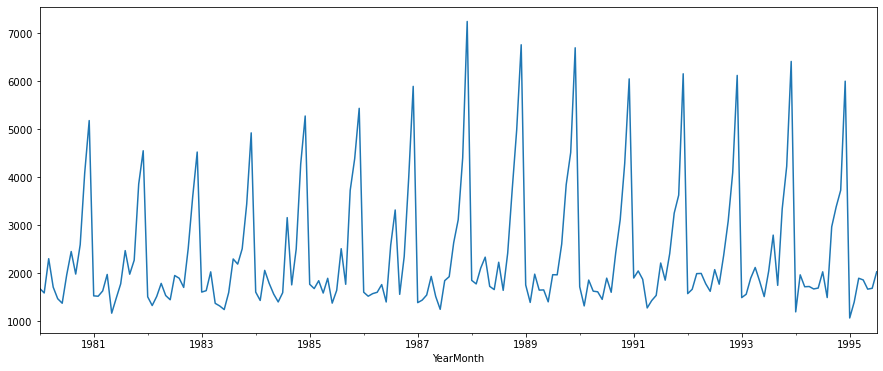

In [10]:
plt.figure(figsize=(15,6))
df_sparkling['Sales'].plot()

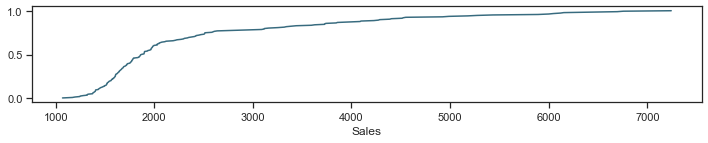

In [11]:
    ## Plot ECDF: Empirical Cumulative Distribution Function
#ECDF - Adds up the number of observations that are there for a certain value.
sns.set(style = "ticks")# to format into seaborn 
c = '#386B7F' # basic color for plots
plt.figure(figsize = (12, 6))

  
plt.subplot(312)
cdf = ECDF(df_sparkling['Sales'])
plt.plot(cdf.x, cdf.y, label = "statmodels", color = c)
plt.xlabel('Sales');

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text major ticklabel objects>)

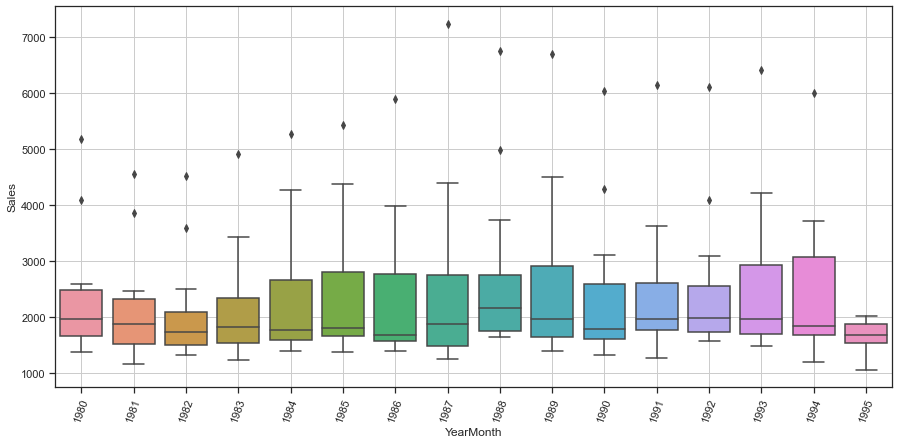

In [12]:
plt.figure(figsize=(15,7))
sns.boxplot(x = df_sparkling.index.year,y = df_sparkling['Sales'])
plt.grid();
plt.xticks(rotation=70)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text major ticklabel objects>)

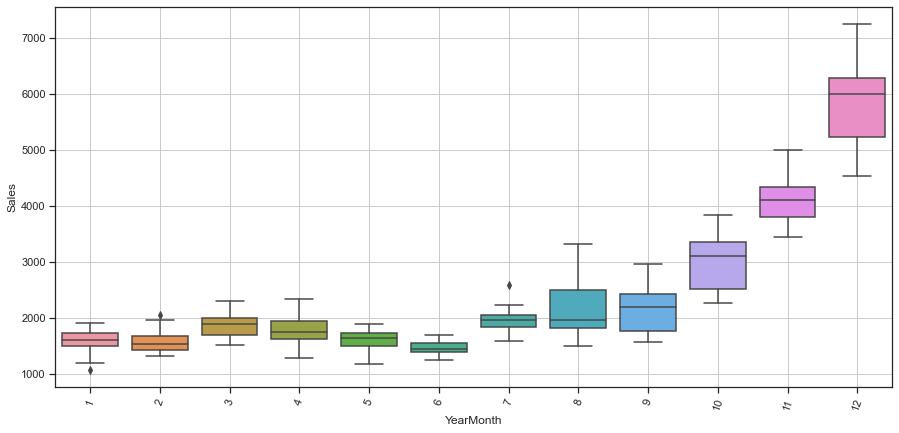

In [13]:
plt.figure(figsize=(15,7))
sns.boxplot(x = df_sparkling.index.month,y = df_sparkling['Sales'])
plt.grid();
plt.xticks(rotation=70)

## Plot a graph of monthly sales across years.

In [14]:
    monthly_sales_across_years = pd.pivot_table(df_sparkling, values = 'Sales', columns = df_sparkling.index.month_name(), index = df_sparkling.index.year)
    monthly_sales_across_years

YearMonth   April  August  December  February  January    July    June  \
YearMonth                                                                
1980       1712.0  2453.0    5179.0    1591.0   1686.0  1966.0  1377.0   
1981       1976.0  2472.0    4551.0    1523.0   1530.0  1781.0  1480.0   
1982       1790.0  1897.0    4524.0    1329.0   1510.0  1954.0  1449.0   
1983       1375.0  2298.0    4923.0    1638.0   1609.0  1600.0  1245.0   
1984       1789.0  3159.0    5274.0    1435.0   1609.0  1597.0  1404.0   
1985       1589.0  2512.0    5434.0    1682.0   1771.0  1645.0  1379.0   
1986       1605.0  3318.0    5891.0    1523.0   1606.0  2584.0  1403.0   
1987       1935.0  1930.0    7242.0    1442.0   1389.0  1847.0  1250.0   
1988       2336.0  1645.0    6757.0    1779.0   1853.0  2230.0  1661.0   
1989       1650.0  1968.0    6694.0    1394.0   1757.0  1971.0  1406.0   
1990       1628.0  1605.0    6047.0    1321.0   1720.0  1899.0  1457.0   
1991       1279.0  1857.0    6153.0    2049.0   1902.0  2214.0  1540.0   
1992       1997.0  1773.0    6119.0    1667.0   1577.0  2076.0  1625.0   
1993       2121.0  2795.0    6410.0    1564.0   1494.0  2048.0  1515.0   
1994       1725.0  1495.0    5999.0    1968.0   1197.0  2031.0  1693.0   
1995       1862.0     NaN       NaN    1402.0   1070.0  2031.0  1688.0   

YearMonth   March     May  November  October  September  
YearMonth                                                
1980       2304.0  1471.0    4087.0   2596.0     1984.0  
1981       1633.0  1170.0    3857.0   2273.0     1981.0  
1982       1518.0  1537.0    3593.0   2514.0     1706.0  
1983       2030.0  1320.0    3440.0   2511.0     2191.0  
1984       2061.0  1567.0    4273.0   2504.0     1759.0  
1985       1846.0  1896.0    4388.0   3727.0     1771.0  
1986       1577.0  1765.0    3987.0   2349.0     1562.0  
1987       1548.0  1518.0    4405.0   3114.0     2638.0  
1988       2108.0  1728.0    4988.0   3740.0     2421.0  
1989       1982.0  1654.0    4514.0   3845.0     2608.0  
1990       1859.0  1615.0    4286.0   3116.0     2424.0  
1991       1874.0  1432.0    3627.0   3252.0     2408.0  
1992       1993.0  1783.0    4096.0   3088.0     2377.0  
1993       1898.0  1831.0    4227.0   3339.0     1749.0  
1994       1720.0  1674.0    3729.0   3385.0     2968.0  
1995       1897.0  1670.0       NaN      NaN        NaN

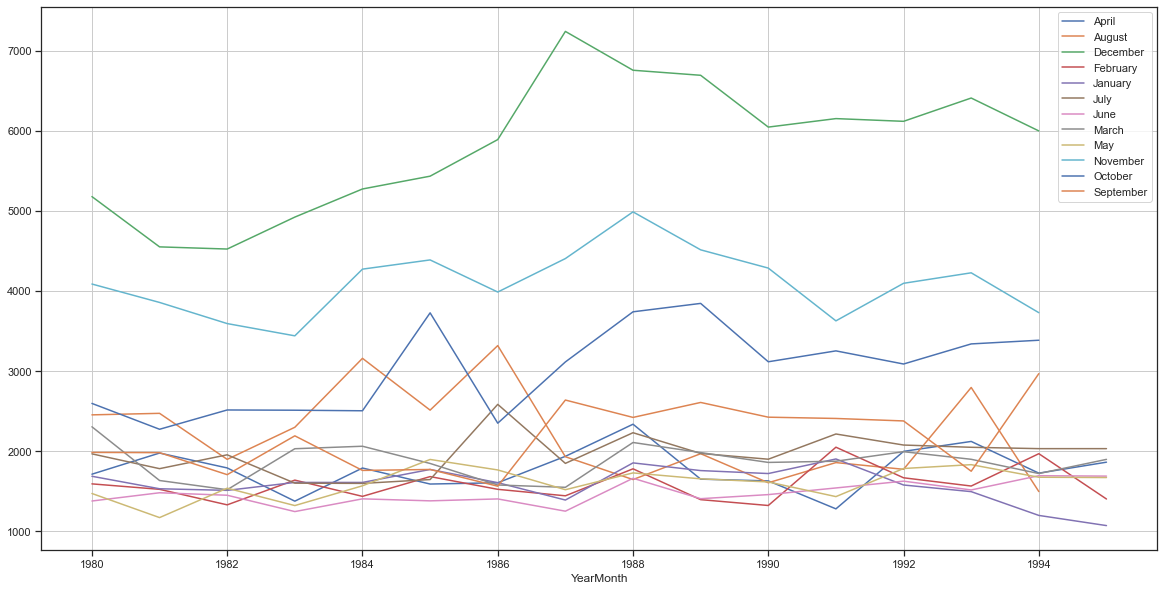

In [15]:
monthly_sales_across_years.plot(figsize=(20,10))
plt.grid()
plt.legend(loc='best');

In [16]:
df_sparkling['Sales'].isna().sum()

0

In [17]:
df_sparkling.tail()

Sales  Year  Month
YearMonth                     
1995-03-01   1897  1995      3
1995-04-01   1862  1995      4
1995-05-01   1670  1995      5
1995-06-01   1688  1995      6
1995-07-01   2031  1995      7

## 3 - Year Sales Graph - UpSample

YearMonth
1980-12-31    28406
1983-12-31    77728
1986-12-31    87241
1989-12-31    94947
1992-12-31    88735
Freq: 3A-DEC, Name: Sales, dtype: int64


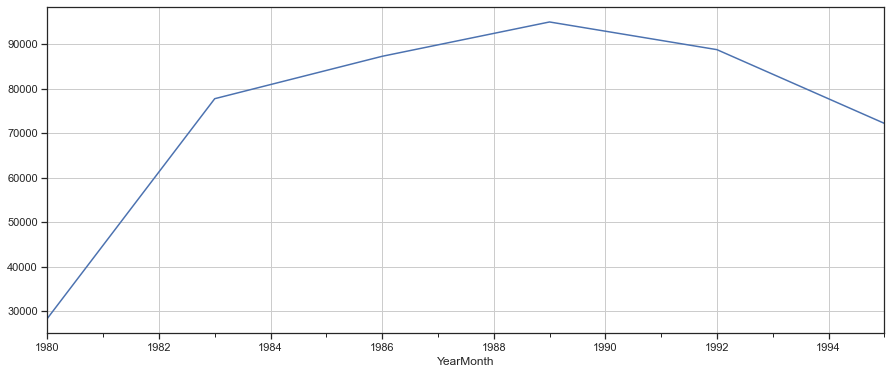

In [19]:
resample = df_sparkling['Sales'].resample('3Y')
yearly_mean_sales = resample.sum()
print(yearly_mean_sales.head() )
plt.figure(figsize=(15,6))
yearly_mean_sales.plot()
plt.grid()
plt.show()

## Quaterly Sales Graph - DownSampling

YearMonth
1980-03-31    1860.333333
1980-06-30    1520.000000
1980-09-30    2134.333333
1980-12-31    3954.000000
1981-03-31    1562.000000
Freq: Q-DEC, Name: Sales, dtype: float64


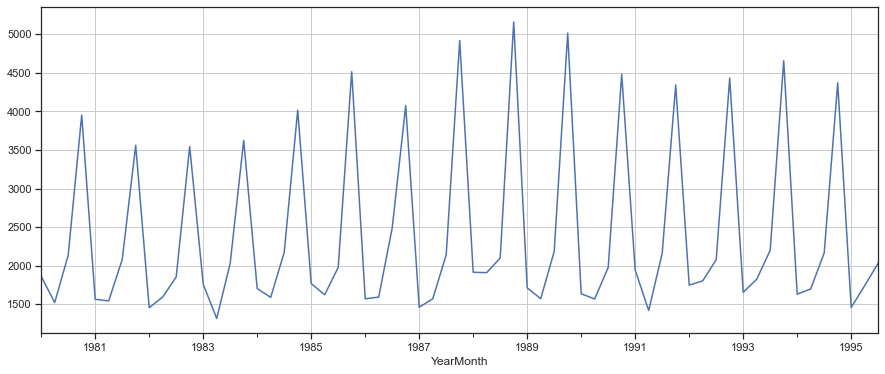

In [20]:
resample             = df_sparkling['Sales'].resample('Q')
quarterly_mean_sales = resample.mean()
print(quarterly_mean_sales.head())
plt.figure(figsize=(15,6))
quarterly_mean_sales.plot()
plt.grid()
plt.show()

(array([66., 62., 17., 10., 10.,  8.,  4.,  3.,  4.,  3.]),
 array([1070. , 1687.2, 2304.4, 2921.6, 3538.8, 4156. , 4773.2, 5390.4,
        6007.6, 6624.8, 7242. ]),
 <a list of 10 Patch objects>)

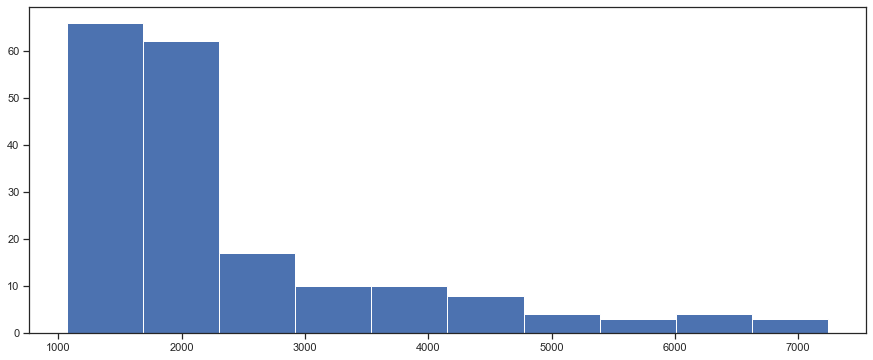

In [21]:
plt.figure(figsize=(15,6))
plt.hist(df_sparkling['Sales'])

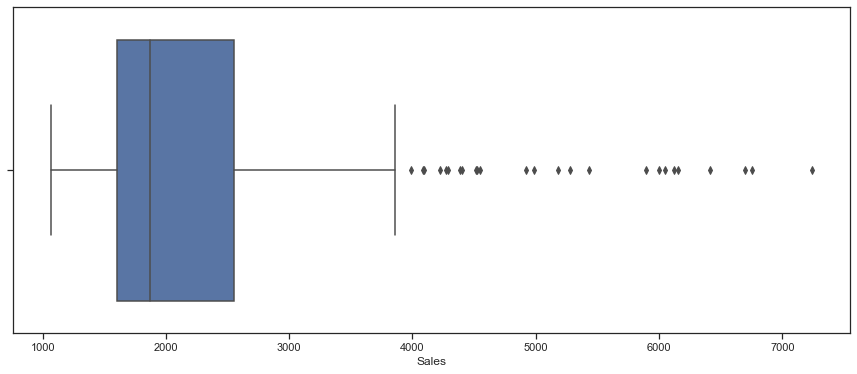

In [22]:
plt.figure(figsize=(15,6))
sns.boxplot(df_sparkling['Sales'])

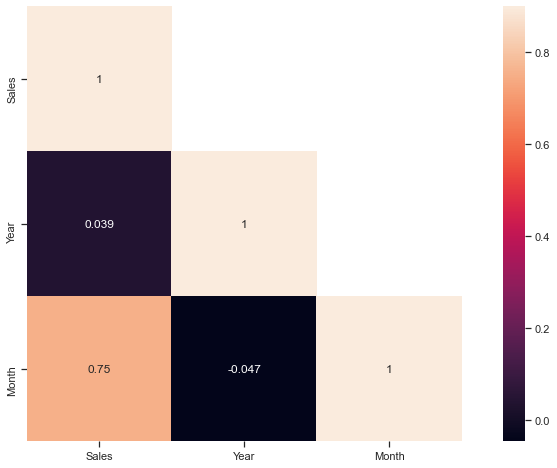

In [23]:
corr_all = df_sparkling.corr()
mask = np.array(corr_all)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(15,8)
sns.heatmap(corr_all, mask=mask,vmax=.9, square=True,annot=True);
plt.show()

In [28]:
for i in np.arange(0,31):
    df_sparkling['lag'+str(i)]=df_sparkling['Sales']-df_sparkling['Sales'].shift(i)

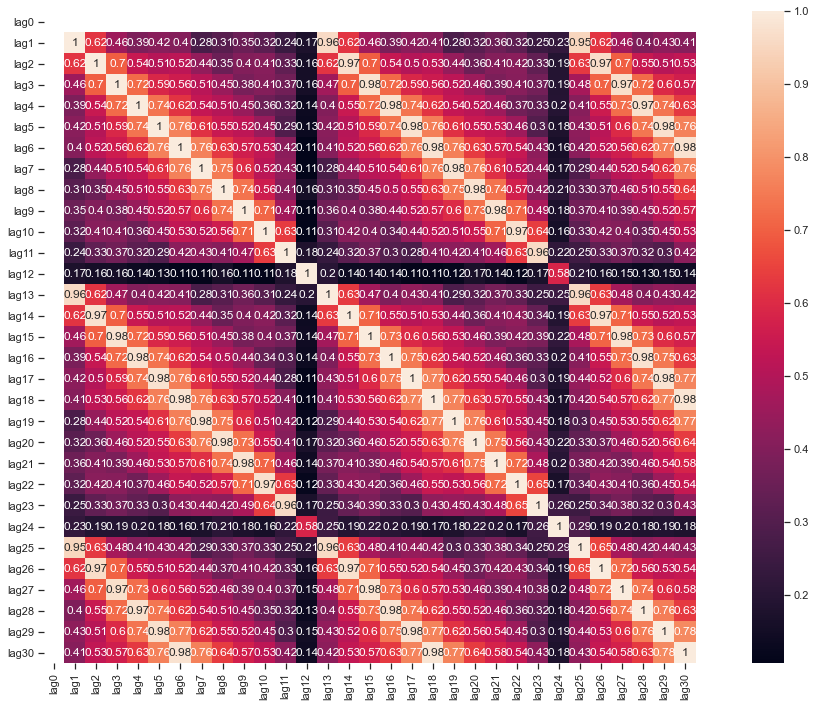

In [29]:
corr_all = df_sparkling.drop(['Sales','Year','Month'],axis=1).corr()
fig,ax= plt.subplots()
fig.set_size_inches(20,12)
sns.heatmap(corr_all,annot=True,square=True)

In [31]:
df_sparkling.drop(['lag0', 'lag1', 'lag2', 'lag3', 'lag4',
       'lag5', 'lag6', 'lag7', 'lag8', 'lag9', 'lag10', 'lag11', 'lag12',
       'lag13', 'lag14', 'lag15', 'lag16', 'lag17', 'lag18', 'lag19', 'lag20',
                   'lag21', 'lag22', 'lag23', 'lag24', 'lag25', 'lag26', 'lag27', 'lag28',
       'lag29', 'lag30'],axis=1,inplace=True)
df_sparkling

Sales  Year  Month
YearMonth                     
1980-01-01   1686  1980      1
1980-02-01   1591  1980      2
1980-03-01   2304  1980      3
1980-04-01   1712  1980      4
1980-05-01   1471  1980      5
...           ...   ...    ...
1995-03-01   1897  1995      3
1995-04-01   1862  1995      4
1995-05-01   1670  1995      5
1995-06-01   1688  1995      6
1995-07-01   2031  1995      7

[187 rows x 3 columns]

# Decomposition

In [32]:
from    statsmodels.tsa.seasonal import   seasonal_decompose

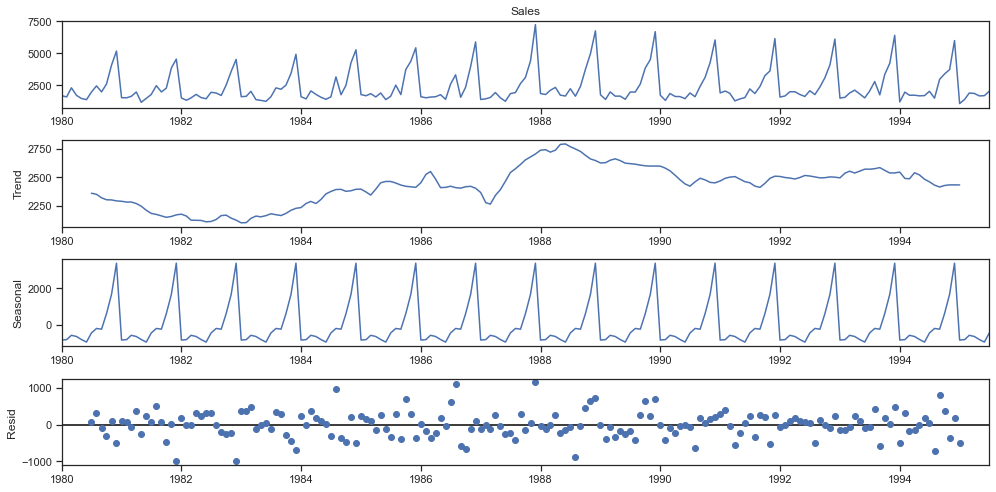

In [33]:
from pylab import rcParams
rcParams['figure.figsize'] = 14, 7

decomposition = seasonal_decompose(df_sparkling['Sales'],model='additive')
decomposition.plot();

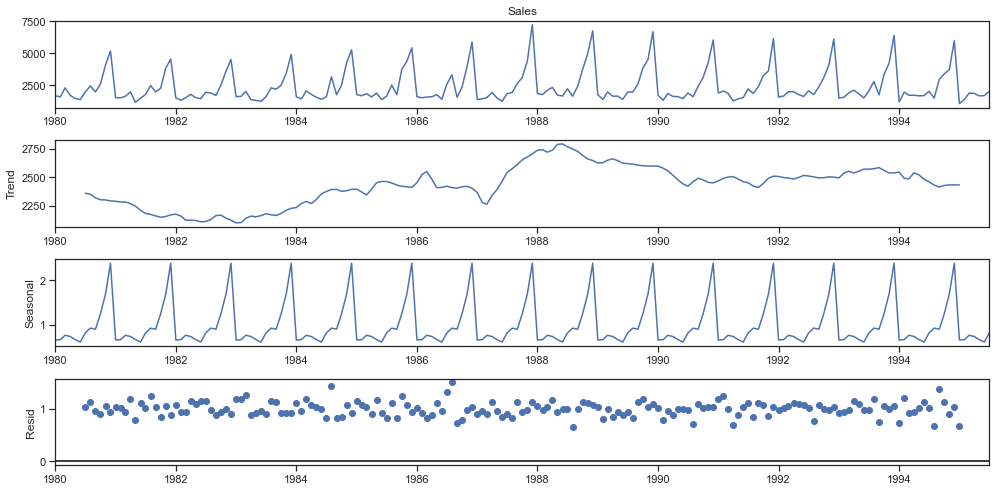

In [34]:
from pylab import rcParams
rcParams['figure.figsize'] = 14, 7

decomposition = seasonal_decompose(df_sparkling['Sales'],model='multiplicative')
decomposition.plot();

In [35]:
decomposition.trend

YearMonth
1980-01-01   NaN
1980-02-01   NaN
1980-03-01   NaN
1980-04-01   NaN
1980-05-01   NaN
              ..
1995-03-01   NaN
1995-04-01   NaN
1995-05-01   NaN
1995-06-01   NaN
1995-07-01   NaN
Name: trend, Length: 187, dtype: float64

In [36]:
decomposition.seasonal

YearMonth
1980-01-01    0.649843
1980-02-01    0.659214
1980-03-01    0.757440
1980-04-01    0.730351
1980-05-01    0.660609
                ...   
1995-03-01    0.757440
1995-04-01    0.730351
1995-05-01    0.660609
1995-06-01    0.603468
1995-07-01    0.809164
Name: seasonal, Length: 187, dtype: float64

In [37]:
decomposition.resid

YearMonth
1980-01-01   NaN
1980-02-01   NaN
1980-03-01   NaN
1980-04-01   NaN
1980-05-01   NaN
              ..
1995-03-01   NaN
1995-04-01   NaN
1995-05-01   NaN
1995-06-01   NaN
1995-07-01   NaN
Name: resid, Length: 187, dtype: float64

## Since residue do not form a flat line in both Multiplicative as well as Additive, we take range of residual as the deciding factor, hence we choose Multiplicative model, since the range is 0 to 1 compared to 0 to +/- 1000 in additive

# Splitting into Test and Train

In [38]:
train = df_sparkling[df_sparkling.index<'1991'] 
test = df_sparkling[df_sparkling.index>='1991']

In [39]:
train.tail()

Sales  Year  Month
YearMonth                     
1990-08-01   1605  1990      8
1990-09-01   2424  1990      9
1990-10-01   3116  1990     10
1990-11-01   4286  1990     11
1990-12-01   6047  1990     12

In [40]:
test.head()

Sales  Year  Month
YearMonth                     
1991-01-01   1902  1991      1
1991-02-01   2049  1991      2
1991-03-01   1874  1991      3
1991-04-01   1279  1991      4
1991-05-01   1432  1991      5

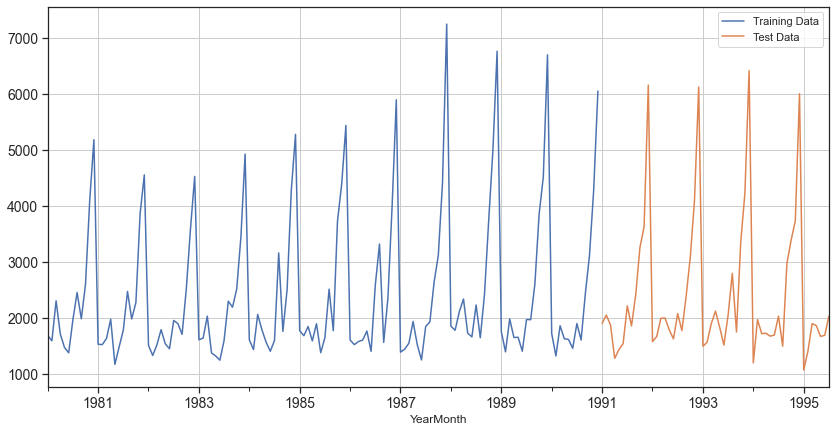

In [41]:
train['Sales'].plot(fontsize=14)
test['Sales'].plot(fontsize=14)
plt.grid()
plt.legend(['Training Data','Test Data'])
plt.show()

# Model 1 - Linear Regression Model

In [42]:
LinearRegression_train = train.copy()
LinearRegression_test = test.copy()

In [43]:
print(len(train))
print(len(test))

132
55


In [44]:
train_time = [i+1 for i in range(len(train))]
test_time = [i+133 for i in range(len(test))]
print('Training Time instance','\n',train_time)
print('Test Time instance','\n',test_time)

Training Time instance 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132]
Test Time instance 
 [133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187]


In [45]:
LinearRegression_train['time'] = train_time
LinearRegression_test['time'] = test_time

print('First few rows of Training Data')
display(LinearRegression_train.head())
print('Last few rows of Training Data')
display(LinearRegression_train.tail())
print('First few rows of Test Data')
display(LinearRegression_test.head())
print('Last few rows of Test Data')
display(LinearRegression_test.tail())

First few rows of Training Data


Sales  Year  Month  time
YearMonth                           
1980-01-01   1686  1980      1     1
1980-02-01   1591  1980      2     2
1980-03-01   2304  1980      3     3
1980-04-01   1712  1980      4     4
1980-05-01   1471  1980      5     5

Last few rows of Training Data


Sales  Year  Month  time
YearMonth                           
1990-08-01   1605  1990      8   128
1990-09-01   2424  1990      9   129
1990-10-01   3116  1990     10   130
1990-11-01   4286  1990     11   131
1990-12-01   6047  1990     12   132

First few rows of Test Data


Sales  Year  Month  time
YearMonth                           
1991-01-01   1902  1991      1   133
1991-02-01   2049  1991      2   134
1991-03-01   1874  1991      3   135
1991-04-01   1279  1991      4   136
1991-05-01   1432  1991      5   137

Last few rows of Test Data


Sales  Year  Month  time
YearMonth                           
1995-03-01   1897  1995      3   183
1995-04-01   1862  1995      4   184
1995-05-01   1670  1995      5   185
1995-06-01   1688  1995      6   186
1995-07-01   2031  1995      7   187

In [46]:
from sklearn.linear_model import LinearRegression

In [47]:
lr = LinearRegression()

In [48]:
lr.fit(LinearRegression_train[['time']],LinearRegression_train['Sales'])

LinearRegression()

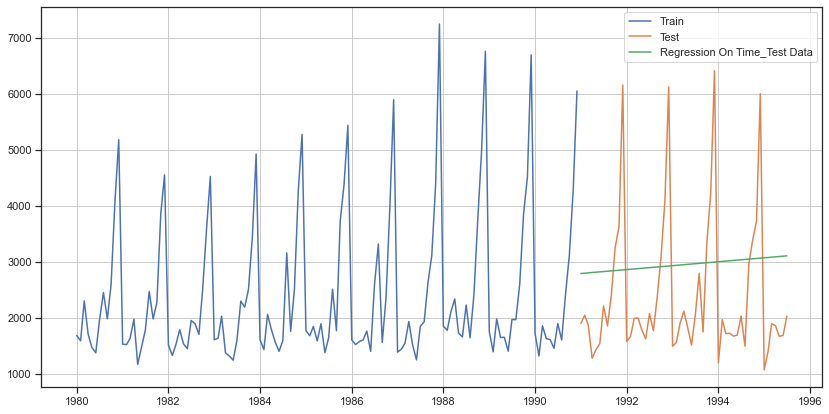

In [49]:
train_predictions_model1         = lr.predict(LinearRegression_train[['time']])
LinearRegression_train['RegOnTime'] = train_predictions_model1

test_predictions_model1         = lr.predict(LinearRegression_test[['time']])
LinearRegression_test['RegOnTime'] = test_predictions_model1

plt.plot( train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Time_Test Data')

plt.legend(loc='best')
plt.grid();

In [50]:
from sklearn import metrics

In [51]:
rmse_model1_test = metrics.mean_squared_error(test['Sales'],test_predictions_model1,squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f " %(rmse_model1_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 1389.135 


In [52]:
resultsDf = pd.DataFrame({'Test RMSE': [rmse_model1_test]},index=['RegressionOnTime'])
resultsDf

Test RMSE
RegressionOnTime  1389.135175

# Model 2 - Naive Bayes Model

In [53]:
NaiveModel_train = train.copy()
NaiveModel_test = test.copy()

In [54]:
NaiveModel_test['naive'] = np.asarray(train['Sales'])[len(np.asarray(train['Sales']))-1]
NaiveModel_test['naive'].head()

YearMonth
1991-01-01    6047
1991-02-01    6047
1991-03-01    6047
1991-04-01    6047
1991-05-01    6047
Name: naive, dtype: int64

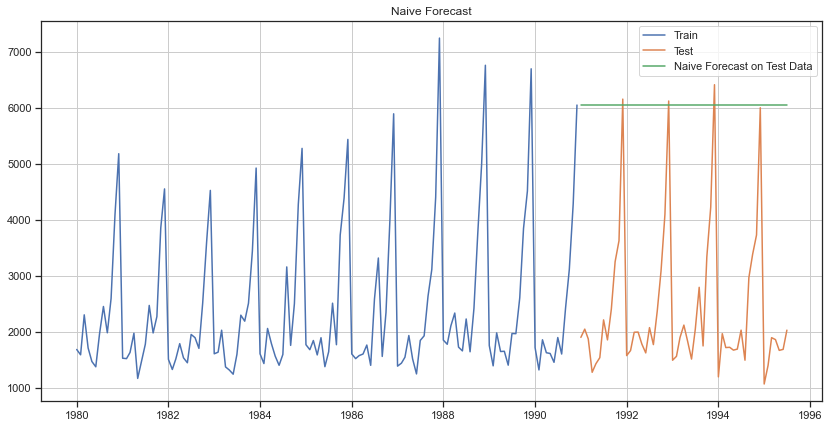

In [55]:
plt.plot(NaiveModel_train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')

plt.plot(NaiveModel_test['naive'], label='Naive Forecast on Test Data')

plt.legend(loc='best')
plt.title("Naive Forecast")
plt.grid();

### Model Evaluation

In [56]:
rmse_model2_test = metrics.mean_squared_error(test['Sales'],NaiveModel_test['naive'],squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f" %(rmse_model2_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 3864.279


In [57]:
resultsDf_2 = pd.DataFrame({'Test RMSE': [rmse_model2_test]},index=['NaiveModel'])

resultsDf = pd.concat([resultsDf, resultsDf_2])
resultsDf

Test RMSE
RegressionOnTime  1389.135175
NaiveModel        3864.279352

# Model 3 - Simple Average

In [58]:
SimpleAverage_train = train.copy()
SimpleAverage_test = test.copy()

In [59]:
SimpleAverage_test['mean_forecast'] = train['Sales'].mean()
SimpleAverage_test.head()

Sales  Year  Month  mean_forecast
YearMonth                                    
1991-01-01   1902  1991      1    2403.780303
1991-02-01   2049  1991      2    2403.780303
1991-03-01   1874  1991      3    2403.780303
1991-04-01   1279  1991      4    2403.780303
1991-05-01   1432  1991      5    2403.780303

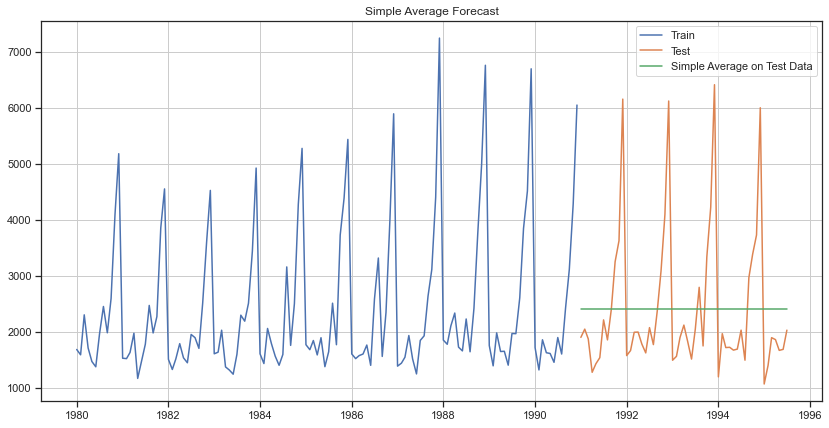

In [60]:
plt.plot(SimpleAverage_train['Sales'], label='Train')
plt.plot(SimpleAverage_test['Sales'], label='Test')

plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')

plt.legend(loc='best')
plt.title("Simple Average Forecast")
plt.grid();

### Model Evaluation

In [61]:
rmse_model3_test = metrics.mean_squared_error(test['Sales'],SimpleAverage_test['mean_forecast'],squared=False)
print("For Simple Average forecast on the Test Data,  RMSE is %3.3f" %(rmse_model3_test))

For Simple Average forecast on the Test Data,  RMSE is 1275.082


In [62]:
resultsDf_3 = pd.DataFrame({'Test RMSE': [rmse_model3_test]}
                           ,index=['SimpleAverageModel'])

resultsDf = pd.concat([resultsDf, resultsDf_3])
resultsDf

Test RMSE
RegressionOnTime    1389.135175
NaiveModel          3864.279352
SimpleAverageModel  1275.081804

# Model 4 - Moving Average

In [63]:
MovingAverage = df_sparkling.copy()
MovingAverage.head()

Sales  Year  Month
YearMonth                     
1980-01-01   1686  1980      1
1980-02-01   1591  1980      2
1980-03-01   2304  1980      3
1980-04-01   1712  1980      4
1980-05-01   1471  1980      5

In [64]:
MovingAverage['Trailing_2'] = MovingAverage['Sales'].rolling(2).mean()
MovingAverage['Trailing_4'] = MovingAverage['Sales'].rolling(4).mean()
MovingAverage['Trailing_6'] = MovingAverage['Sales'].rolling(6).mean()
MovingAverage['Trailing_9'] = MovingAverage['Sales'].rolling(9).mean()

MovingAverage.head()

Sales  Year  Month  Trailing_2  Trailing_4  Trailing_6  Trailing_9
YearMonth                                                                     
1980-01-01   1686  1980      1         NaN         NaN         NaN         NaN
1980-02-01   1591  1980      2      1638.5         NaN         NaN         NaN
1980-03-01   2304  1980      3      1947.5         NaN         NaN         NaN
1980-04-01   1712  1980      4      2008.0     1823.25         NaN         NaN
1980-05-01   1471  1980      5      1591.5     1769.50         NaN         NaN

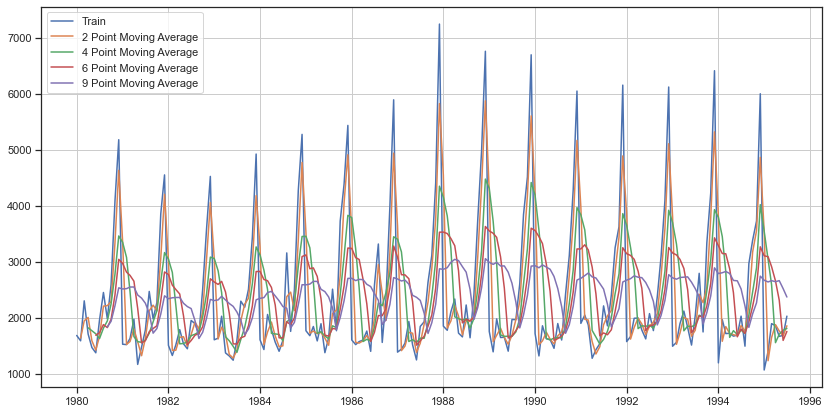

In [65]:
## Plotting on the whole data

plt.plot(MovingAverage['Sales'], label='Train')
plt.plot(MovingAverage['Trailing_2'], label='2 Point Moving Average')
plt.plot(MovingAverage['Trailing_4'], label='4 Point Moving Average')
plt.plot(MovingAverage['Trailing_6'],label = '6 Point Moving Average')
plt.plot(MovingAverage['Trailing_9'],label = '9 Point Moving Average')

plt.legend(loc = 'best')
plt.grid();

In [66]:
trailing_MovingAverage_train = MovingAverage[MovingAverage.index<'1991'] 
trailing_MovingAverage_test = MovingAverage[MovingAverage.index>='1991']

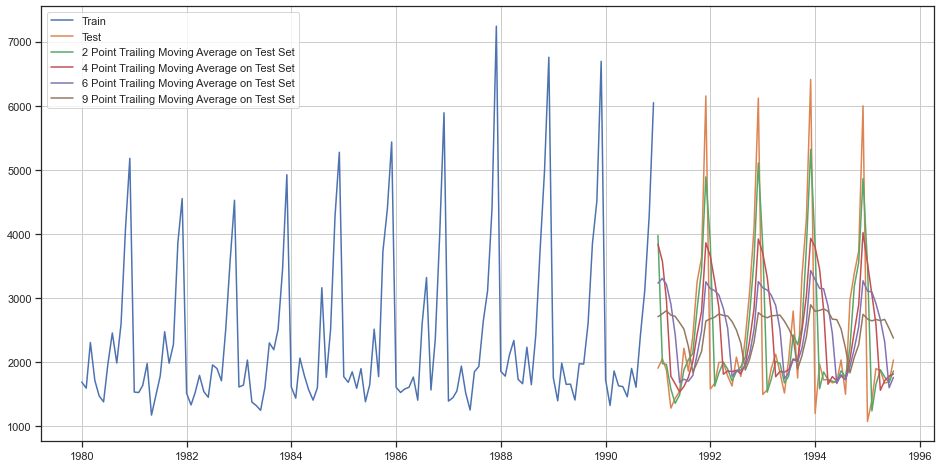

In [67]:
## Plotting on both the Training and Test data

plt.figure(figsize=(16,8))
plt.plot(trailing_MovingAverage_train['Sales'], label='Train')
plt.plot(trailing_MovingAverage_test['Sales'], label='Test')


plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_4'], label='4 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_6'],label = '6 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_9'],label = '9 Point Trailing Moving Average on Test Set')

plt.legend(loc = 'best')
plt.grid();

### Model Evaluation

In [68]:
## Test Data - RMSE  --> 2 point Trailing MA

rmse_model4_test_2 = metrics.mean_squared_error(test['Sales'],trailing_MovingAverage_test['Trailing_2'],squared=False)
print("For 2 point Moving Average Model forecast on the Test Data,  RMSE is %3.3f" %(rmse_model4_test_2))

## Test Data - RMSE --> 4 point Trailing MA

rmse_model4_test_4 = metrics.mean_squared_error(test['Sales'],trailing_MovingAverage_test['Trailing_4'],squared=False)
print("For 4 point Moving Average Model forecast on the Test Data,  RMSE is %3.3f" %(rmse_model4_test_4))

## Test Data - RMSE --> 6 point Trailing MA

rmse_model4_test_6 = metrics.mean_squared_error(test['Sales'],trailing_MovingAverage_test['Trailing_6'],squared=False)
print("For 6 point Moving Average Model forecast on the Test Data,  RMSE is %3.3f" %(rmse_model4_test_6))

## Test Data - RMSE --> 9 point Trailing MA

rmse_model4_test_9 = metrics.mean_squared_error(test['Sales'],trailing_MovingAverage_test['Trailing_9'],squared=False)
print("For 9 point Moving Average Model forecast on the Test Data,  RMSE is %3.3f" %(rmse_model4_test_9))

For 2 point Moving Average Model forecast on the Test Data,  RMSE is 813.401
For 4 point Moving Average Model forecast on the Test Data,  RMSE is 1156.590
For 6 point Moving Average Model forecast on the Test Data,  RMSE is 1283.927
For 9 point Moving Average Model forecast on the Test Data,  RMSE is 1346.278


In [69]:
resultsDf_4 = pd.DataFrame({'Test RMSE': [rmse_model4_test_2,rmse_model4_test_4
                                          ,rmse_model4_test_6,rmse_model4_test_9]}
                           ,index=['2pointTrailingMovingAverage','4pointTrailingMovingAverage'
                                   ,'6pointTrailingMovingAverage','9pointTrailingMovingAverage'])

resultsDf = pd.concat([resultsDf, resultsDf_4])
resultsDf

Test RMSE
RegressionOnTime             1389.135175
NaiveModel                   3864.279352
SimpleAverageModel           1275.081804
2pointTrailingMovingAverage   813.400684
4pointTrailingMovingAverage  1156.589694
6pointTrailingMovingAverage  1283.927428
9pointTrailingMovingAverage  1346.278315

# Plotting all models so far

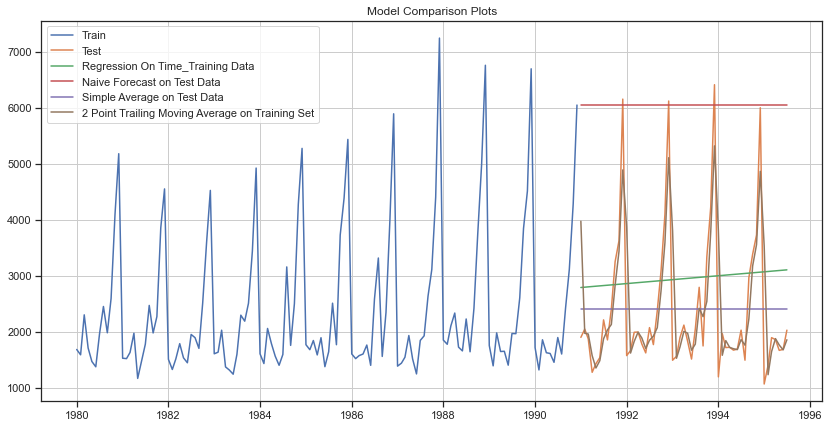

In [70]:
## Plotting on both Training and Test data

plt.plot(train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')

plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Time_Training Data')

plt.plot(NaiveModel_test['naive'], label='Naive Forecast on Test Data')

plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')

plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Training Set')


plt.legend(loc='best')
plt.title("Model Comparison Plots")
plt.grid();

# Model 5 - Single Exponential Smoothing

In [71]:
SES_train=train.copy()
SES_test=test.copy()

In [72]:
## First we will define an empty dataframe to store our values from the loop

resultsDf_temp = pd.DataFrame({'Alpha Values':[],'Train RMSE':[],'Test RMSE': []})
resultsDf_temp

Empty DataFrame
Columns: [Alpha Values, Train RMSE, Test RMSE]
Index: []

In [73]:
# create class
model_SES = SimpleExpSmoothing(train['Sales'])

In [74]:
model_SES_autofit = model_SES.fit(optimized=True)

In [75]:
model_SES_autofit.params

{'smoothing_level': 0.0,
 'smoothing_slope': nan,
 'smoothing_seasonal': nan,
 'damping_slope': nan,
 'initial_level': 2403.785621547663,
 'initial_slope': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [76]:
SES_test['predict'] = model_SES_autofit.forecast(steps=len(test))
SES_test.head()

Sales  Year  Month      predict
YearMonth                                  
1991-01-01   1902  1991      1  2403.785622
1991-02-01   2049  1991      2  2403.785622
1991-03-01   1874  1991      3  2403.785622
1991-04-01   1279  1991      4  2403.785622
1991-05-01   1432  1991      5  2403.785622

In [77]:
## Test Data

rmse_model5_test_1 = metrics.mean_squared_error(SES_test['Sales'],SES_test['predict'],squared=False)
print("For Alpha =0.0 Simple Exponential Smoothing Model forecast on the Test Data, RMSE is %3.3f" %(rmse_model5_test_1))


For Alpha =0.0 Simple Exponential Smoothing Model forecast on the Test Data, RMSE is 1275.082


In [78]:
resultsDf_temp = pd.DataFrame({'Test RMSE': rmse_model5_test_1}
                           ,index=['Alpha=0.0,SimpleExponentialSmoothing_Auto_Fit'])

resultsDf = pd.concat([resultsDf, resultsDf_temp])
resultsDf

Test RMSE
RegressionOnTime                               1389.135175
NaiveModel                                     3864.279352
SimpleAverageModel                             1275.081804
2pointTrailingMovingAverage                     813.400684
4pointTrailingMovingAverage                    1156.589694
6pointTrailingMovingAverage                    1283.927428
9pointTrailingMovingAverage                    1346.278315
Alpha=0.0,SimpleExponentialSmoothing_Auto_Fit  1275.081823

In [79]:
del resultsDf_temp
## First we will define an empty dataframe to store our values from the loop

resultsDf_temp = pd.DataFrame({'Alpha Values':[],'Train RMSE':[],'Test RMSE': []})
resultsDf_temp

Empty DataFrame
Columns: [Alpha Values, Train RMSE, Test RMSE]
Index: []

In [80]:
for i in np.arange(0.1,1,0.1):
    model_SES_alpha_i = model_SES.fit(smoothing_level=i,optimized=False,use_brute=True)
    SES_train['predict',i] = model_SES_alpha_i.fittedvalues
    SES_test['predict',i] = model_SES_alpha_i.forecast(steps=len(SES_test))
    
    rmse_model5_train_i = metrics.mean_squared_error(SES_train['Sales'],SES_train['predict',i],squared=False)
    
    rmse_model5_test_i = metrics.mean_squared_error(SES_test['Sales'],SES_test['predict',i],squared=False)
    
    resultsDf_temp = resultsDf_temp.append({'Alpha Values':i,'Train RMSE':rmse_model5_train_i 
                                      ,'Test RMSE':rmse_model5_test_i}, ignore_index=True)

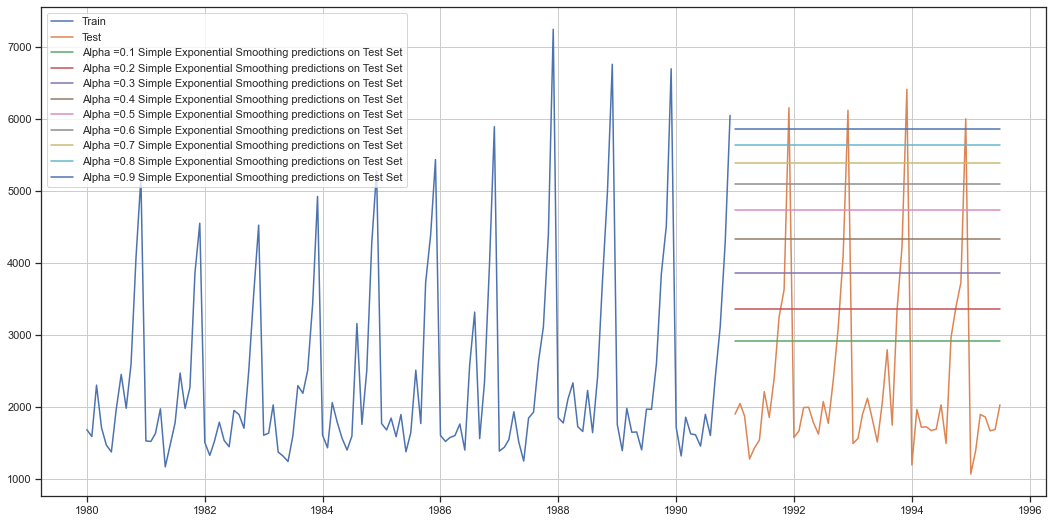

In [83]:
## Plotting on both the Training and Test data

plt.figure(figsize=(18,9))
plt.plot(SES_train['Sales'], label='Train')
plt.plot(SES_test['Sales'], label='Test')

plt.plot(SES_test['predict', 0.1], label='Alpha =0.1 Simple Exponential Smoothing predictions on Test Set')
plt.plot(SES_test['predict', 0.2], label='Alpha =0.2 Simple Exponential Smoothing predictions on Test Set')
plt.plot(SES_test['predict', 0.30000000000000004], label='Alpha =0.3 Simple Exponential Smoothing predictions on Test Set')
plt.plot(SES_test['predict', 0.4], label='Alpha =0.4 Simple Exponential Smoothing predictions on Test Set')
plt.plot(SES_test['predict', 0.5], label='Alpha =0.5 Simple Exponential Smoothing predictions on Test Set')
plt.plot(SES_test['predict', 0.6], label='Alpha =0.6 Simple Exponential Smoothing predictions on Test Set')
plt.plot(SES_test['predict', 0.7000000000000001], label='Alpha =0.7 Simple Exponential Smoothing predictions on Test Set')
plt.plot(SES_test['predict', 0.8], label='Alpha =0.8 Simple Exponential Smoothing predictions on Test Set')
plt.plot(SES_test['predict', 0.9], label='Alpha =0.9 Simple Exponential Smoothing predictions on Test Set')



plt.legend(loc='best')
plt.grid();

### Model Evaluation

In [84]:
resultsDf_temp.sort_values(by=['Test RMSE'],ascending=True)

Alpha Values   Train RMSE    Test RMSE
0           0.1  1333.873836  1375.393398
1           0.2  1356.042987  1595.206839
2           0.3  1359.511747  1935.507132
3           0.4  1352.588879  2311.919615
4           0.5  1344.004369  2666.351413
5           0.6  1338.805381  2979.204388
6           0.7  1338.844308  3249.944092
7           0.8  1344.462091  3483.801006
8           0.9  1355.723518  3686.794285

In [85]:
resultsDf_5 = pd.DataFrame({'Test RMSE': [resultsDf_temp.sort_values(by=['Test RMSE'],ascending=True).values[0][2]]}
                           ,index=['Alpha=0.1,SimpleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_5])
resultsDf

Test RMSE
RegressionOnTime                               1389.135175
NaiveModel                                     3864.279352
SimpleAverageModel                             1275.081804
2pointTrailingMovingAverage                     813.400684
4pointTrailingMovingAverage                    1156.589694
6pointTrailingMovingAverage                    1283.927428
9pointTrailingMovingAverage                    1346.278315
Alpha=0.0,SimpleExponentialSmoothing_Auto_Fit  1275.081823
Alpha=0.1,SimpleExponentialSmoothing           1375.393398

# Model 6 - Double Exponential Smoothing (Holts Model)

In [86]:
DES_train = train.copy()
DES_test = test.copy()

In [87]:
model_DES = Holt(DES_train['Sales'])

In [88]:
## First we will define an empty dataframe to store our values from the loop

resultsDf_6 = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Train RMSE':[],'Test RMSE': []})
resultsDf_6

Empty DataFrame
Columns: [Alpha Values, Beta Values, Train RMSE, Test RMSE]
Index: []

In [89]:
model_DES_autofit = model_DES.fit(optimized=True)

In [90]:
model_DES_autofit.params

{'smoothing_level': 0.6477924009906908,
 'smoothing_slope': 0.0,
 'smoothing_seasonal': nan,
 'damping_slope': nan,
 'initial_level': 1686.083776800016,
 'initial_slope': 27.059653074962753,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [91]:
DES_test['predict'] = model_DES_autofit.forecast(steps=len(test))
DES_test.head()

Sales  Year  Month      predict
YearMonth                                  
1991-01-01   1902  1991      1  5281.439591
1991-02-01   2049  1991      2  5308.499244
1991-03-01   1874  1991      3  5335.558897
1991-04-01   1279  1991      4  5362.618550
1991-05-01   1432  1991      5  5389.678203

In [92]:
## Test Data

rmse_model_temp = metrics.mean_squared_error(SES_test['Sales'],SES_test['predict'],squared=False)
print("For Alpha =0.6477, Beta = 0.0 Double Exponential Smoothing Model forecast on the Test Data, RMSE is %3.3f" %(rmse_model_temp))


For Alpha =0.6477, Beta = 0.0 Double Exponential Smoothing Model forecast on the Test Data, RMSE is 1275.082


In [93]:
resultsDf_temp = pd.DataFrame({'Test RMSE': rmse_model_temp}
                           ,index=['Alpha=0.6477,Beta=0.0,DoubleExponentialSmoothing_Auto_Fit'])

resultsDf = pd.concat([resultsDf, resultsDf_temp])
resultsDf

Test RMSE
RegressionOnTime                                    1389.135175
NaiveModel                                          3864.279352
SimpleAverageModel                                  1275.081804
2pointTrailingMovingAverage                          813.400684
4pointTrailingMovingAverage                         1156.589694
6pointTrailingMovingAverage                         1283.927428
9pointTrailingMovingAverage                         1346.278315
Alpha=0.0,SimpleExponentialSmoothing_Auto_Fit       1275.081823
Alpha=0.1,SimpleExponentialSmoothing                1375.393398
Alpha=0.6477,Beta=0.0,DoubleExponentialSmoothin...  1275.081823

In [94]:
for i in np.arange(0.1,1.1,0.1):
    for j in np.arange(0.1,1.1,0.1):
        model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
        DES_train['predict',i,j] = model_DES_alpha_i_j.fittedvalues
        DES_test['predict',i,j] = model_DES_alpha_i_j.forecast(steps=len(DES_test))
        
        rmse_model6_train = metrics.mean_squared_error(DES_train['Sales'],DES_train['predict',i,j],squared=False)
        
        rmse_model6_test = metrics.mean_squared_error(DES_test['Sales'],DES_test['predict',i,j],squared=False)
        
        resultsDf_6 = resultsDf_6.append({'Alpha Values':i,'Beta Values':j,'Train RMSE':rmse_model6_train
                                          ,'Test RMSE':rmse_model6_test}, ignore_index=True)

In [95]:
resultsDf_6

Alpha Values  Beta Values   Train RMSE     Test RMSE
0            0.1          0.1  1382.520870   1778.564670
1            0.1          0.2  1413.598835   2599.439986
2            0.1          0.3  1445.762015   4293.084674
3            0.1          0.4  1480.897776   6039.537339
4            0.1          0.5  1521.108657   7390.522201
..           ...          ...          ...           ...
95           1.0          0.6  1753.402326  49327.087977
96           1.0          0.7  1825.187155  52655.765663
97           1.0          0.8  1902.013709  55442.273880
98           1.0          0.9  1985.368445  57823.177011
99           1.0          1.0  2077.672157  59877.076519

[100 rows x 4 columns]

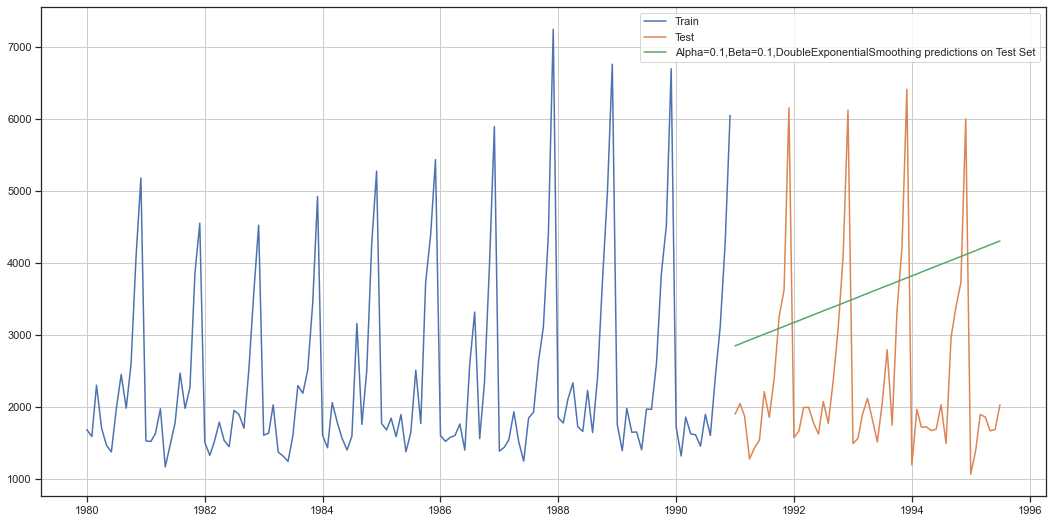

In [98]:
## Plotting on both the Training and Test data

plt.figure(figsize=(18,9))
plt.plot(DES_train['Sales'], label='Train')
plt.plot(DES_test['Sales'], label='Test')

plt.plot(DES_test['predict', 0.1, 0.1], label='Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid();

### Model Evaluation

In [99]:
resultsDf_6.sort_values(by=['Test RMSE']).head()

Alpha Values  Beta Values   Train RMSE    Test RMSE
0            0.1          0.1  1382.520870  1778.564670
1            0.1          0.2  1413.598835  2599.439986
10           0.2          0.1  1418.041591  3611.763322
2            0.1          0.3  1445.762015  4293.084674
20           0.3          0.1  1431.169601  5908.185554

In [100]:
resultsDf_6_1 = pd.DataFrame({'Test RMSE': [resultsDf_6.sort_values(by=['Test RMSE']).values[0][3]]}
                           ,index=['Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_6_1])
resultsDf

Test RMSE
RegressionOnTime                                    1389.135175
NaiveModel                                          3864.279352
SimpleAverageModel                                  1275.081804
2pointTrailingMovingAverage                          813.400684
4pointTrailingMovingAverage                         1156.589694
6pointTrailingMovingAverage                         1283.927428
9pointTrailingMovingAverage                         1346.278315
Alpha=0.0,SimpleExponentialSmoothing_Auto_Fit       1275.081823
Alpha=0.1,SimpleExponentialSmoothing                1375.393398
Alpha=0.6477,Beta=0.0,DoubleExponentialSmoothin...  1275.081823
Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing       1778.564670

# Model 7 - Tripple Exponential Smoothing (Holt - Winters Model)

In [103]:
TES_train = train.copy()
TES_test = test.copy()

In [104]:
model_TES_ta_sa = ExponentialSmoothing(TES_train['Sales'],trend='additive',seasonal='additive')
model_TES_ta_sm = ExponentialSmoothing(TES_train['Sales'],trend='additive',seasonal='multiplicative')
model_TES_tm_sm = ExponentialSmoothing(TES_train['Sales'],trend='multiplicative',seasonal='multiplicative')
model_TES_tm_sa = ExponentialSmoothing(TES_train['Sales'],trend='multiplicative',seasonal='additive')

In [105]:
## First we will define an empty dataframe to store our values from the loop

resultsDf_7_2 = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Gamma Values':[],'Train RMSE':[],'Test RMSE': []})
resultsDf_7_2

Empty DataFrame
Columns: [Alpha Values, Beta Values, Gamma Values, Train RMSE, Test RMSE]
Index: []

In [106]:
model_TES_autofit_ta_sa = model_TES_ta_sa.fit(optimized=True)
model_TES_autofit_ta_sm = model_TES_ta_sm.fit(optimized=True)
model_TES_autofit_tm_sm = model_TES_tm_sm.fit(optimized=True)
model_TES_autofit_tm_sa = model_TES_tm_sa.fit(optimized=True)

In [107]:
model_TES_autofit_ta_sa.params

{'smoothing_level': 0.08621976457712728,
 'smoothing_slope': 1.3722820308989836e-08,
 'smoothing_seasonal': 0.4763668704627969,
 'damping_slope': nan,
 'initial_level': 1684.7567371537205,
 'initial_slope': 0.00663980720702693,
 'initial_seasons': array([  39.19865194,  -37.26225944,  465.11612145,  205.83244815,
        -140.69775927, -156.92133674,  338.06682948,  856.76977123,
         403.45669741,  971.24810067, 2401.69439277, 3426.88784686]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [108]:
model_TES_autofit_ta_sm.params

{'smoothing_level': 0.15420626100710186,
 'smoothing_slope': 5.31004588730174e-21,
 'smoothing_seasonal': 0.3713228125445634,
 'damping_slope': nan,
 'initial_level': 1639.99933972618,
 'initial_slope': 4.847695527861546,
 'initial_seasons': array([1.00842978, 0.96899514, 1.24181168, 1.13206716, 0.93979295,
        0.93811177, 1.22457951, 1.54428109, 1.27335495, 1.631977  ,
        2.48292059, 3.11861503]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [109]:
model_TES_autofit_tm_sm.params

{'smoothing_level': 0.1531678720511238,
 'smoothing_slope': 1.3401209517237263e-23,
 'smoothing_seasonal': 0.36915130391258183,
 'damping_slope': nan,
 'initial_level': 1640.0000614777875,
 'initial_slope': 1.0028238716252538,
 'initial_seasons': array([1.00776273, 0.96828241, 1.24122834, 1.13173194, 0.93916605,
        0.9374639 , 1.22455468, 1.54494427, 1.27366006, 1.63384343,
        2.48600254, 3.12359333]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [110]:
model_TES_autofit_tm_sa.params

{'smoothing_level': 0.08315542790884507,
 'smoothing_slope': 7.862493548953155e-09,
 'smoothing_seasonal': 0.4910188366592172,
 'damping_slope': nan,
 'initial_level': 1640.000003218715,
 'initial_slope': 0.999825076323949,
 'initial_seasons': array([  45.99999823,  -48.99999913,  663.99997028,   72.0000183 ,
        -168.99999691, -262.99998542,  326.00000118,  813.00000596,
         344.00000846,  956.00000252, 2446.99999408, 3538.99998438]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [111]:
TES_test['predict_ta_sa'] = model_TES_autofit_ta_sa.forecast(steps=len(test))
TES_test.head()

Sales  Year  Month  predict_ta_sa
YearMonth                                    
1991-01-01   1902  1991      1    1532.422201
1991-02-01   2049  1991      2    1241.380627
1991-03-01   1874  1991      3    1726.781065
1991-04-01   1279  1991      4    1584.320418
1991-05-01   1432  1991      5    1494.023217

In [112]:
TES_test['predict_ta_sm'] = model_TES_autofit_ta_sm.forecast(steps=len(test))
TES_test.head()

Sales  Year  Month  predict_ta_sa  predict_ta_sm
YearMonth                                                   
1991-01-01   1902  1991      1    1532.422201    1602.194523
1991-02-01   2049  1991      2    1241.380627    1373.889119
1991-03-01   1874  1991      3    1726.781065    1807.439476
1991-04-01   1279  1991      4    1584.320418    1704.573982
1991-05-01   1432  1991      5    1494.023217    1602.374672

In [113]:
TES_test['predict_tm_sm'] = model_TES_autofit_tm_sm.forecast(steps=len(test))
TES_test.head()

Sales  Year  Month  predict_ta_sa  predict_ta_sm  predict_tm_sm
YearMonth                                                                  
1991-01-01   1902  1991      1    1532.422201    1602.194523    1603.525270
1991-02-01   2049  1991      2    1241.380627    1373.889119    1375.925171
1991-03-01   1874  1991      3    1726.781065    1807.439476    1808.716307
1991-04-01   1279  1991      4    1584.320418    1704.573982    1706.484971
1991-05-01   1432  1991      5    1494.023217    1602.374672    1603.529886

In [114]:
TES_test['predict_tm_sa'] = model_TES_autofit_tm_sa.forecast(steps=len(test))
TES_test.head()

Sales  Year  Month  predict_ta_sa  predict_ta_sm  predict_tm_sm  \
YearMonth                                                                     
1991-01-01   1902  1991      1    1532.422201    1602.194523    1603.525270   
1991-02-01   2049  1991      2    1241.380627    1373.889119    1375.925171   
1991-03-01   1874  1991      3    1726.781065    1807.439476    1808.716307   
1991-04-01   1279  1991      4    1584.320418    1704.573982    1706.484971   
1991-05-01   1432  1991      5    1494.023217    1602.374672    1603.529886   

            predict_tm_sa  
YearMonth                  
1991-01-01    1535.337567  
1991-02-01    1238.464471  
1991-03-01    1727.680107  
1991-04-01    1580.053280  
1991-05-01    1492.372737

In [115]:
## Test Data

rmse_model_temp_ta_sa = metrics.mean_squared_error(TES_test['Sales'],TES_test['predict_ta_sa'],squared=False)
print("For Alpha =0.08621, Beta = 1.3722, Gamma = 0.4763 Tripple Exponential Smoothing Model (Trend = Additive, Seasonality = Additive) forecast on the Test Data, RMSE is %3.3f" 
      %(rmse_model_temp_ta_sa))


For Alpha =0.08621, Beta = 1.3722, Gamma = 0.4763 Tripple Exponential Smoothing Model (Trend = Additive, Seasonality = Additive) forecast on the Test Data, RMSE is 362.733


In [116]:
## Test Data

rmse_model_temp_ta_sm = metrics.mean_squared_error(TES_test['Sales'],TES_test['predict_ta_sm'],squared=False)
print("For Alpha =0.1542, Beta = 5.3100, Gamma = 0.3713 Tripple Exponential Smoothing Model (Trend = Additive, Seasonality = Multiplicative) forecast on the Test Data, RMSE is %3.3f" 
      %(rmse_model_temp_ta_sm))


For Alpha =0.1542, Beta = 5.3100, Gamma = 0.3713 Tripple Exponential Smoothing Model (Trend = Additive, Seasonality = Multiplicative) forecast on the Test Data, RMSE is 383.158


In [117]:
## Test Data

rmse_model_temp_tm_sm = metrics.mean_squared_error(TES_test['Sales'],TES_test['predict_tm_sm'],squared=False)
print("For Alpha =0.1531, Beta = 1.3401, Gamma = 0.3691 Tripple Exponential Smoothing Model (Trend = Multiplicative, Seasonality = Multiplicative) forecast on the Test Data, RMSE is %3.3f" 
      %(rmse_model_temp_tm_sm))


For Alpha =0.1531, Beta = 1.3401, Gamma = 0.3691 Tripple Exponential Smoothing Model (Trend = Multiplicative, Seasonality = Multiplicative) forecast on the Test Data, RMSE is 393.072


In [118]:
## Test Data

rmse_model_temp_tm_sa = metrics.mean_squared_error(TES_test['Sales'],TES_test['predict_tm_sa'],squared=False)
print("For Alpha =0.0831, Beta = 7.8624, Gamma = 0.4910 Tripple Exponential Smoothing Model (Trend = Multiplicative, Seasonality = Additive) forecast on the Test Data, RMSE is %3.3f" 
      %(rmse_model_temp_tm_sa))


For Alpha =0.0831, Beta = 7.8624, Gamma = 0.4910 Tripple Exponential Smoothing Model (Trend = Multiplicative, Seasonality = Additive) forecast on the Test Data, RMSE is 366.954


## Best out of the 4 being Trend - Additive and Seasonality - Additive with RMSE of 362.733

In [119]:
resultsDf_temp = pd.DataFrame({'Test RMSE': rmse_model_temp}
                           ,index=['Alpha=0.08621,Beta=1.3722,Gamma=0.4763,TrippleExponentialSmoothing_Auto_Fit'])

resultsDf = pd.concat([resultsDf, resultsDf_temp])
resultsDf

Test RMSE
RegressionOnTime                                    1389.135175
NaiveModel                                          3864.279352
SimpleAverageModel                                  1275.081804
2pointTrailingMovingAverage                          813.400684
4pointTrailingMovingAverage                         1156.589694
6pointTrailingMovingAverage                         1283.927428
9pointTrailingMovingAverage                         1346.278315
Alpha=0.0,SimpleExponentialSmoothing_Auto_Fit       1275.081823
Alpha=0.1,SimpleExponentialSmoothing                1375.393398
Alpha=0.6477,Beta=0.0,DoubleExponentialSmoothin...  1275.081823
Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing       1778.564670
Alpha=0.08621,Beta=1.3722,Gamma=0.4763,TrippleE...  1275.081823

In [130]:
TES_train = train.copy()
TES_test = test.copy()

In [131]:
del resultsDf_7_2
## First we will define an empty dataframe to store our values from the loop

resultsDf_7_2 = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Gamma Values':[],'Train RMSE':[],'Test RMSE': [],
                             'Method' : []})
resultsDf_7_2

Empty DataFrame
Columns: [Alpha Values, Beta Values, Gamma Values, Train RMSE, Test RMSE, Method]
Index: []

In [132]:
for i in np.arange(0.1,1.1,0.1):
    for j in np.arange(0.1,1.1,0.1):
        for k in np.arange(0.1,1.1,0.1):
            model_TES_alpha_i_j_k = model_TES_ta_sa.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=False,use_brute=True)
            TES_train['predict_ta_sa',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
            TES_test['predict_ta_sa',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=len(test))
        
            rmse_model7_train = metrics.mean_squared_error(TES_train['Sales'],TES_train['predict_ta_sa',i,j,k],squared=False)
            
            rmse_model7_test = metrics.mean_squared_error(TES_test['Sales'],TES_test['predict_ta_sa',i,j,k].replace(np.inf,0).replace(np.nan,0).dropna(),squared=False)
            
            resultsDf_7_2 = resultsDf_7_2.append({'Alpha Values':i,'Beta Values':j,'Gamma Values':k,
                                                  'Train RMSE':rmse_model7_train,'Test RMSE':rmse_model7_test, 'Method':'ta_sa'}
                                                 , ignore_index=True)

In [133]:
for i in np.arange(0.1,1.1,0.1):
    for j in np.arange(0.1,1.1,0.1):
        for k in np.arange(0.1,1.1,0.1):
            model_TES_alpha_i_j_k = model_TES_ta_sm.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=False,use_brute=True)
            TES_train['predict_ta_sm',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
            TES_test['predict_ta_sm',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=len(test))
        
            rmse_model7_train = metrics.mean_squared_error(TES_train['Sales'],TES_train['predict_ta_sm',i,j,k],squared=False)
            
            rmse_model7_test = metrics.mean_squared_error(TES_test['Sales'],TES_test['predict_ta_sm',i,j,k].replace(np.inf,0).replace(np.nan,0).dropna(),squared=False)
            
            resultsDf_7_2 = resultsDf_7_2.append({'Alpha Values':i,'Beta Values':j,'Gamma Values':k,
                                                  'Train RMSE':rmse_model7_train,'Test RMSE':rmse_model7_test, 'Method':'ta_sm'}
                                                 , ignore_index=True)

In [134]:
for i in np.arange(0.1,1.0,0.1):
    for j in np.arange(0.1,1.0,0.1):
        for k in np.arange(0.1,1.0,0.1):
            model_TES_alpha_i_j_k = model_TES_tm_sm.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=False,use_brute=True)
            TES_train['predict_tm_sm',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
            TES_test['predict_tm_sm',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=len(test))
        
            rmse_model7_train = metrics.mean_squared_error(TES_train['Sales'],TES_train['predict_tm_sm',i,j,k],squared=False)
            
            rmse_model7_test = metrics.mean_squared_error(TES_test['Sales'],TES_test['predict_tm_sm',i,j,k].replace(np.inf,0).replace(np.nan,0).dropna(),squared=False)
            
            resultsDf_7_2 = resultsDf_7_2.append({'Alpha Values':i,'Beta Values':j,'Gamma Values':k,
                                                  'Train RMSE':rmse_model7_train,'Test RMSE':rmse_model7_test, 'Method':'tm_sm'}
                                                 , ignore_index=True)

In [135]:
for i in np.arange(0.1,1.0,0.1):
    for j in np.arange(0.1,1.0,0.1):
        for k in np.arange(0.1,1.0,0.1):
            model_TES_alpha_i_j_k = model_TES_tm_sa.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=False,use_brute=True)
            TES_train['predict_tm_sa',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
            TES_test['predict_tm_sa',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=len(test))
        
            rmse_model7_train = metrics.mean_squared_error(TES_train['Sales'],TES_train['predict_tm_sa',i,j,k],squared=False)
            
            rmse_model7_test = metrics.mean_squared_error(TES_test['Sales'],TES_test['predict_tm_sa',i,j,k].replace(np.inf,0).replace(np.nan,0).dropna(),squared=False)
            
            resultsDf_7_2 = resultsDf_7_2.append({'Alpha Values':i,'Beta Values':j,'Gamma Values':k,
                                                  'Train RMSE':rmse_model7_train,'Test RMSE':rmse_model7_test, 'Method':'tm_sa'}
                                                 , ignore_index=True)

In [140]:
pd.set_option('display.max_columns', None)
TES_test.head()

Sales  Year  Month  (predict_ta_sa, 0.1, 0.1, 0.1)  \
YearMonth                                                        
1991-01-01   1902  1991      1                     1658.850090   
1991-02-01   2049  1991      2                     1518.478676   
1991-03-01   1874  1991      3                     1985.217621   
1991-04-01   1279  1991      4                     1752.085669   
1991-05-01   1432  1991      5                     1552.602399   

            (predict_ta_sa, 0.1, 0.1, 0.2)  \
YearMonth                                    
1991-01-01                     1538.271525   
1991-02-01                     1350.333297   
1991-03-01                     1757.146147   
1991-04-01                     1631.126057   
1991-05-01                     1467.996910   

            (predict_ta_sa, 0.1, 0.1, 0.30000000000000004)  \
YearMonth                                                    
1991-01-01                                     1472.414057   
1991-02-01                                     1235.896183   
1991-03-01                                     1650.744927   
1991-04-01                                     1535.619123   
1991-05-01                                     1395.022153   

            (predict_ta_sa, 0.1, 0.1, 0.4)  (predict_ta_sa, 0.1, 0.1, 0.5)  \
YearMonth                                                                    
1991-01-01                     1444.810651                     1440.059072   
1991-02-01                     1162.888019                     1118.314284   
1991-03-01                     1606.819179                     1593.747015   
1991-04-01                     1469.202452                     1424.247542   
1991-05-01                     1347.506140                     1324.261757   

            (predict_ta_sa, 0.1, 0.1, 0.6)  \
YearMonth                                    
1991-01-01                     1446.452604   
1991-02-01                     1091.672308   
1991-03-01                     1593.602111   
1991-04-01                     1393.226709   
1991-05-01                     1318.006205   

            (predict_ta_sa, 0.1, 0.1, 0.7000000000000001)  \
YearMonth                                                   
1991-01-01                                    1456.101726   
1991-02-01                                    1075.380435   
1991-03-01                                    1595.700147   
1991-04-01                                    1370.974322   
1991-05-01                                    1319.843136   

            (predict_ta_sa, 0.1, 0.1, 0.8)  (predict_ta_sa, 0.1, 0.1, 0.9)  \
YearMonth                                                                    
1991-01-01                     1463.878923                     1466.062360   
1991-02-01                     1063.997351                     1053.105376   
1991-03-01                     1593.502760                     1582.778085   
1991-04-01                     1353.954808                     1339.142124   
1991-05-01                     1321.225638                     1314.675249   

            (predict_ta_sa, 0.1, 0.1, 1.0)  (predict_ta_sa, 0.1, 0.2, 0.1)  \
YearMonth                                                                    
1991-01-01                     1459.153097                     1553.642714   
1991-02-01                     1038.287880                     1406.740293   
1991-03-01                     1560.175336                     1868.734391   
1991-04-01                     1323.186665                     1633.670923   
1991-05-01                     1293.932378                     1432.757242   

            (predict_ta_sa, 0.1, 0.2, 0.2)  \
YearMonth                                    
1991-01-01                     1447.435498   
1991-02-01                     1247.932831   
1991-03-01                     1645.669765   
1991-04-01                     1513.067396   
1991-05-01                     1344.676147   

            (predict_ta_sa, 0.1, 0.2, 0.30000000000000004)  \
YearMonth     

### Model Evaluation

In [136]:
resultsDf_7_2.sort_values(by=['Test RMSE']).head()

Alpha Values  Beta Values  Gamma Values  Train RMSE   Test RMSE Method
2245           0.4          0.1           0.3  386.113240  326.869742  tm_sm
2163           0.3          0.1           0.2  381.218292  329.977234  tm_sm
1301           0.4          0.1           0.2  389.772245  336.715250  ta_sm
85             0.1          0.9           0.6  438.525019  338.458417  ta_sa
139            0.2          0.4           1.0  483.673805  338.840640  ta_sa

## Best figures obtained for Trend = Multiplicative and Seasonality = Multiplicative

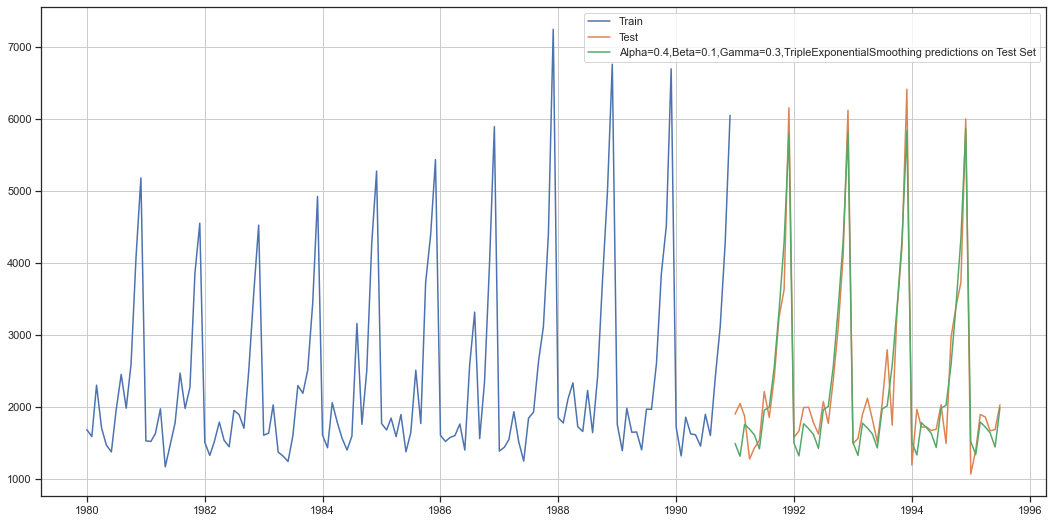

In [142]:
## Plotting on both the Training and Test data using brute force alpha, beta and gamma determination

plt.figure(figsize=(18,9))
plt.plot(TES_train['Sales'], label='Train')
plt.plot(TES_test['Sales'], label='Test')

#The value of alpha and beta is taken like that by python
plt.plot(TES_test['predict_tm_sm', 0.4, 0.1, 0.30000000000000004], 
         label='Alpha=0.4,Beta=0.1,Gamma=0.3,TripleExponentialSmoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid();

In [143]:
resultsDf_7_3 = pd.DataFrame({'Test RMSE': [resultsDf_7_2.sort_values(by=['Test RMSE']).values[0][4]]}
                           ,index=['Alpha=0.4,Beta=0.1,Gamma=0.3,TripleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_7_3])
resultsDf

Test RMSE
RegressionOnTime                                    1389.135175
NaiveModel                                          3864.279352
SimpleAverageModel                                  1275.081804
2pointTrailingMovingAverage                          813.400684
4pointTrailingMovingAverage                         1156.589694
6pointTrailingMovingAverage                         1283.927428
9pointTrailingMovingAverage                         1346.278315
Alpha=0.0,SimpleExponentialSmoothing_Auto_Fit       1275.081823
Alpha=0.1,SimpleExponentialSmoothing                1375.393398
Alpha=0.6477,Beta=0.0,DoubleExponentialSmoothin...  1275.081823
Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing       1778.564670
Alpha=0.08621,Beta=1.3722,Gamma=0.4763,TrippleE...  1275.081823
Alpha=0.4,Beta=0.1,Gamma=0.3,TripleExponentialS...   326.869742

# Model 8 - ARIMA

## Check for Stationarity

In [144]:
## Test for stationarity of the series - Dicky Fuller test

from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=12).mean() #determining the rolling mean
    rolstd = timeseries.rolling(window=12).std()   #determining the rolling standard deviation

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput,'\n')

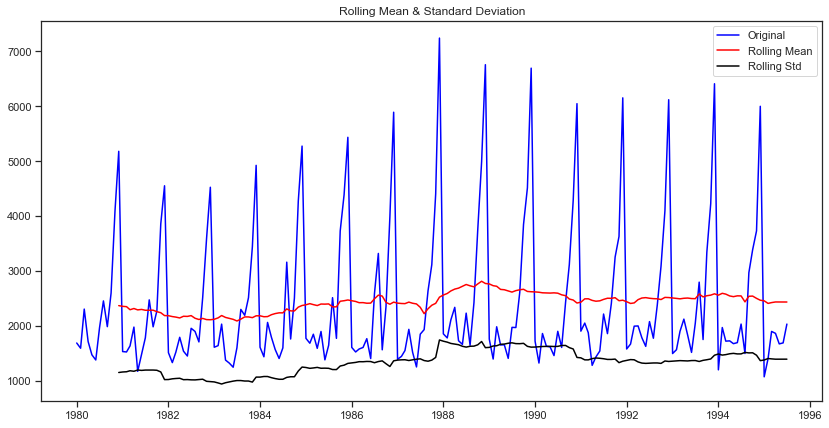

Results of Dickey-Fuller Test:
Test Statistic                  -1.360497
p-value                          0.601061
#Lags Used                      11.000000
Number of Observations Used    175.000000
Critical Value (1%)             -3.468280
Critical Value (5%)             -2.878202
Critical Value (10%)            -2.575653
dtype: float64 



In [145]:
test_stationarity(df_sparkling['Sales'])

# H0 - Series is not Stationary
# Ha - Series is Stationary

### We see that at 5% significant level, we fail to reject the null hypothesis and hence the Time Series is non-stationary.

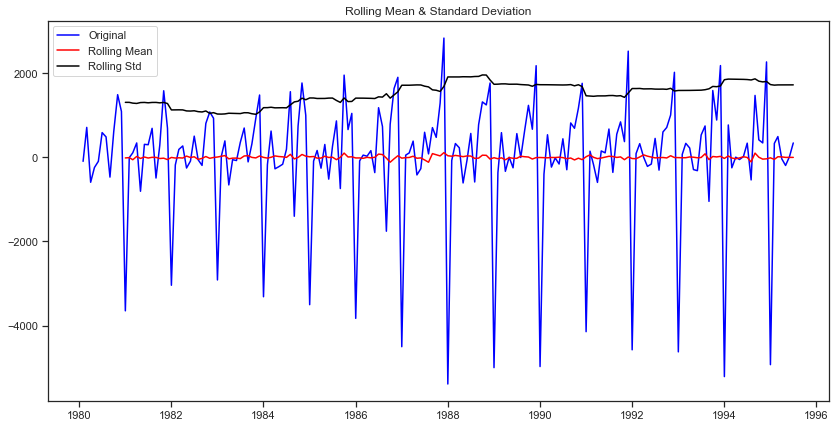

Results of Dickey-Fuller Test:
Test Statistic                 -45.050301
p-value                          0.000000
#Lags Used                      10.000000
Number of Observations Used    175.000000
Critical Value (1%)             -3.468280
Critical Value (5%)             -2.878202
Critical Value (10%)            -2.575653
dtype: float64 



In [146]:
test_stationarity(df_sparkling['Sales'].diff().dropna())

### After keeping d=1 we can see the series has become stationary

### We see that at $\alpha$ = 0.05 the Time Series is indeed stationary.

## Plot the Autocorrelation and the Partial Autocorrelation function plots on the whole data.

In [147]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

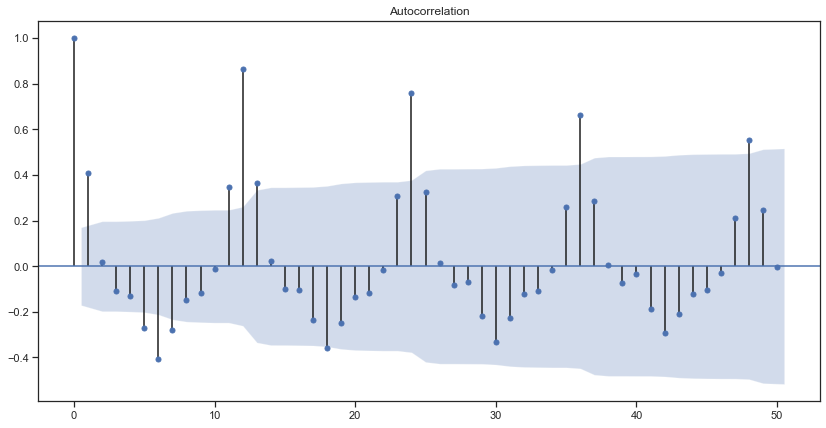

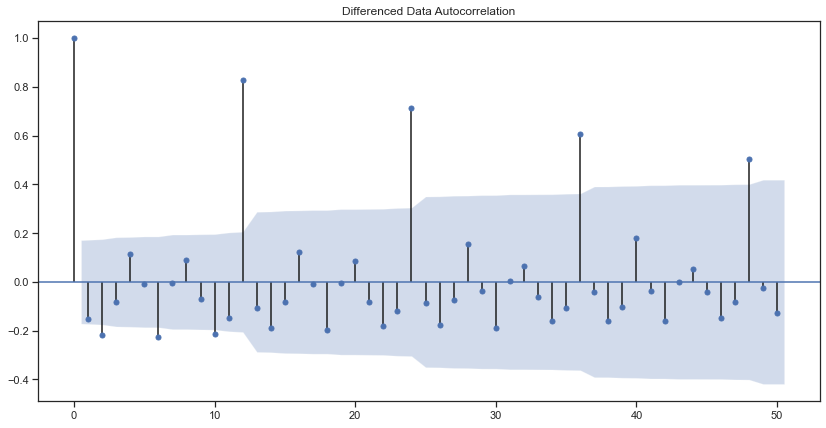

In [251]:
plot_acf(train['Sales'],lags=50)
plot_acf(train['Sales'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plt.show()

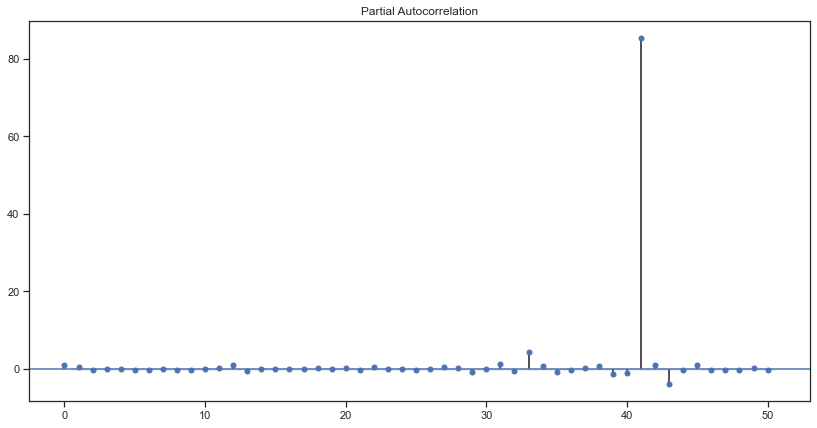

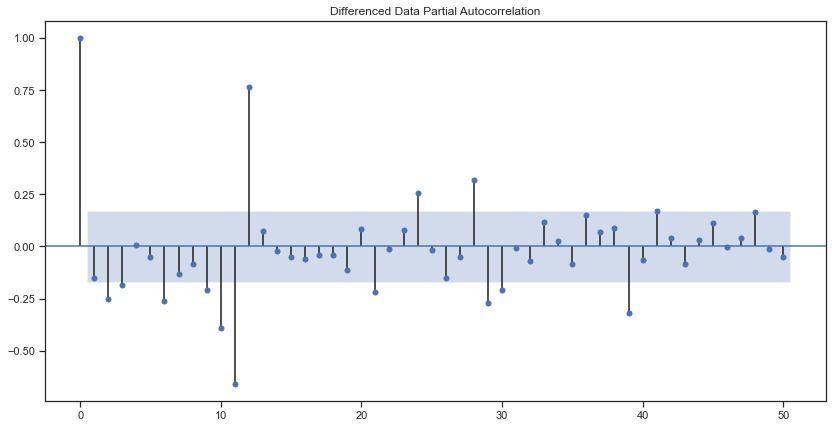

In [252]:
plot_pacf(train['Sales'],lags=50)
plot_pacf(train['Sales'].diff().dropna(),lags=50,title='Differenced Data Partial Autocorrelation')
plt.show()

In [150]:
print(train.shape)
print(test.shape)

(132, 3)
(55, 3)


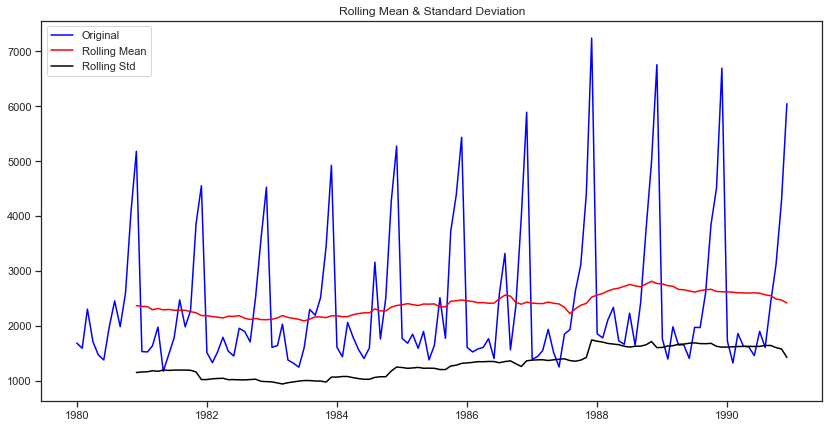

Results of Dickey-Fuller Test:
Test Statistic                  -1.208926
p-value                          0.669744
#Lags Used                      12.000000
Number of Observations Used    119.000000
Critical Value (1%)             -3.486535
Critical Value (5%)             -2.886151
Critical Value (10%)            -2.579896
dtype: float64 



In [151]:
test_stationarity(train['Sales'])

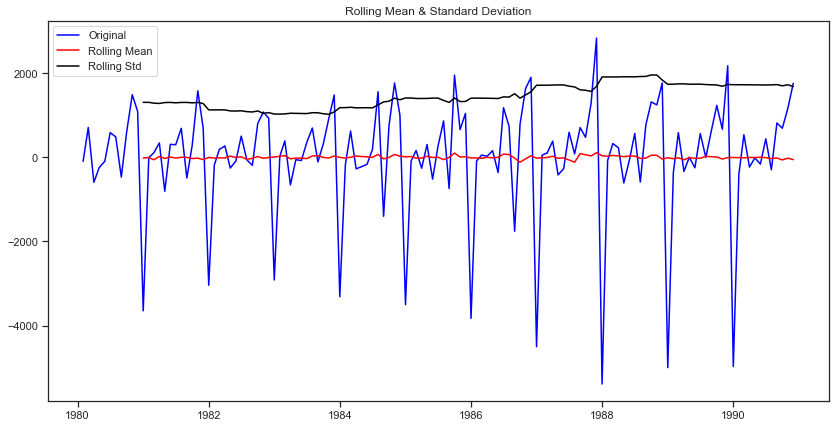

Results of Dickey-Fuller Test:
Test Statistic                -8.005007e+00
p-value                        2.280104e-12
#Lags Used                     1.100000e+01
Number of Observations Used    1.190000e+02
Critical Value (1%)           -3.486535e+00
Critical Value (5%)           -2.886151e+00
Critical Value (10%)          -2.579896e+00
dtype: float64 



In [152]:
test_stationarity(train['Sales'].diff().dropna())

We see that after taking a difference of order 1 the series have become stationary at $\alpha$ = 0.05.

In [153]:
train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 132 entries, 1980-01-01 to 1990-12-01
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Sales   132 non-null    int64
 1   Year    132 non-null    int64
 2   Month   132 non-null    int64
dtypes: int64(3)
memory usage: 4.1 KB


In [154]:
## The following loop helps us in getting a combination of different parameters of p and q in the range of 0 and 2
## We have kept the value of d as 1 as we need to take a difference of the series to make it stationary.

import itertools
p = q = range(0, 4)
d= range(1,2) #since series is stationary at d=1
pdq = list(itertools.product(p, d, q))
print('Some parameter combinations for the Model...')
for i in range(1,len(pdq)):
    print('Model: {}'.format(pdq[i]))

Some parameter combinations for the Model...
Model: (0, 1, 1)
Model: (0, 1, 2)
Model: (0, 1, 3)
Model: (1, 1, 0)
Model: (1, 1, 1)
Model: (1, 1, 2)
Model: (1, 1, 3)
Model: (2, 1, 0)
Model: (2, 1, 1)
Model: (2, 1, 2)
Model: (2, 1, 3)
Model: (3, 1, 0)
Model: (3, 1, 1)
Model: (3, 1, 2)
Model: (3, 1, 3)


In [155]:
# Creating an empty Dataframe with column names only
ARIMA_AIC = pd.DataFrame(columns=['param', 'AIC'])
ARIMA_AIC

Empty DataFrame
Columns: [param, AIC]
Index: []

In [156]:
from statsmodels.tsa.arima_model import ARIMA

for param in pdq:
    ARIMA_model = ARIMA(train['Sales'].values,order=param).fit()
    print('ARIMA{} - AIC:{}'.format(param,ARIMA_model.aic))
    ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)

ARIMA(0, 1, 0) - AIC:2269.582796371201
ARIMA(0, 1, 1) - AIC:2264.906437115225
ARIMA(0, 1, 2) - AIC:2232.7830976841665
ARIMA(0, 1, 3) - AIC:2233.0166051371166
ARIMA(1, 1, 0) - AIC:2268.5280605942976
ARIMA(1, 1, 1) - AIC:2235.0139453494457
ARIMA(1, 1, 2) - AIC:2233.5976471189274
ARIMA(1, 1, 3) - AIC:2234.5741415462044
ARIMA(2, 1, 0) - AIC:2262.0356001096925
ARIMA(2, 1, 1) - AIC:2232.360489886391
ARIMA(2, 1, 2) - AIC:2210.6189875760692
ARIMA(2, 1, 3) - AIC:2229.358093770626
ARIMA(3, 1, 0) - AIC:2259.4715548721306
ARIMA(3, 1, 1) - AIC:2233.921755451612
ARIMA(3, 1, 2) - AIC:2228.928725547137
ARIMA(3, 1, 3) - AIC:2225.6615585275695


In [157]:
## Sort the above AIC values in the ascending order to get the parameters for the minimum AIC value

ARIMA_AIC.sort_values(by='AIC',ascending=True)

param          AIC
10  (2, 1, 2)  2210.618988
15  (3, 1, 3)  2225.661559
14  (3, 1, 2)  2228.928726
11  (2, 1, 3)  2229.358094
9   (2, 1, 1)  2232.360490
2   (0, 1, 2)  2232.783098
3   (0, 1, 3)  2233.016605
6   (1, 1, 2)  2233.597647
13  (3, 1, 1)  2233.921755
7   (1, 1, 3)  2234.574142
5   (1, 1, 1)  2235.013945
12  (3, 1, 0)  2259.471555
8   (2, 1, 0)  2262.035600
1   (0, 1, 1)  2264.906437
4   (1, 1, 0)  2268.528061
0   (0, 1, 0)  2269.582796

In [158]:
auto_ARIMA = ARIMA(train['Sales'], order=(2,1,2))

results_auto_ARIMA = auto_ARIMA.fit()

print(results_auto_ARIMA.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.Sales   No. Observations:                  131
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -1099.309
Method:                       css-mle   S.D. of innovations           1012.929
Date:                Sun, 08 Nov 2020   AIC                           2210.619
Time:                        11:50:59   BIC                           2227.870
Sample:                    02-01-1980   HQIC                          2217.629
                         - 12-01-1990                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             5.5854      0.517     10.806      0.000       4.572       6.598
ar.L1.D.Sales     1.2699      0.075     17.046      0.000       1.124       1.416
ar.L2.D.Sales    -0.5602      0.074     

## Predict

In [159]:
predicted_auto_ARIMA = results_auto_ARIMA.forecast(steps=len(test))

In [161]:
from sklearn.metrics import  mean_squared_error
rmse_auto_arima = mean_squared_error(test['Sales'],predicted_auto_ARIMA[0],squared=False)
print(rmse_auto_arima)

1374.484105408576


In [162]:
resultsDf_8_1 = pd.DataFrame({'Test RMSE': rmse_auto_arima}
                           ,index=['p=2,d=1,q=2,Auto_ARIMA'])

resultsDf = pd.concat([resultsDf, resultsDf_8_1])
resultsDf

Test RMSE
RegressionOnTime                                    1389.135175
NaiveModel                                          3864.279352
SimpleAverageModel                                  1275.081804
2pointTrailingMovingAverage                          813.400684
4pointTrailingMovingAverage                         1156.589694
6pointTrailingMovingAverage                         1283.927428
9pointTrailingMovingAverage                         1346.278315
Alpha=0.0,SimpleExponentialSmoothing_Auto_Fit       1275.081823
Alpha=0.1,SimpleExponentialSmoothing                1375.393398
Alpha=0.6477,Beta=0.0,DoubleExponentialSmoothin...  1275.081823
Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing       1778.564670
Alpha=0.08621,Beta=1.3722,Gamma=0.4763,TrippleE...  1275.081823
Alpha=0.4,Beta=0.1,Gamma=0.3,TripleExponentialS...   326.869742
p=2,d=1,q=2,Auto_ARIMA                              1374.484105

# Model 9 - SARIMA

In [163]:
import itertools
p = q = range(0, 4)
d= range(0,2)
D = range(0,2)
pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, D, q))]
print('Examples of some parameter combinations for Model...')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], model_pdq[i]))

Examples of some parameter combinations for Model...
Model: (0, 0, 1)(0, 0, 1, 12)
Model: (0, 0, 2)(0, 0, 2, 12)
Model: (0, 0, 3)(0, 0, 3, 12)
Model: (0, 1, 0)(0, 1, 0, 12)
Model: (0, 1, 1)(0, 1, 1, 12)
Model: (0, 1, 2)(0, 1, 2, 12)
Model: (0, 1, 3)(0, 1, 3, 12)
Model: (1, 0, 0)(1, 0, 0, 12)
Model: (1, 0, 1)(1, 0, 1, 12)
Model: (1, 0, 2)(1, 0, 2, 12)
Model: (1, 0, 3)(1, 0, 3, 12)
Model: (1, 1, 0)(1, 1, 0, 12)
Model: (1, 1, 1)(1, 1, 1, 12)
Model: (1, 1, 2)(1, 1, 2, 12)
Model: (1, 1, 3)(1, 1, 3, 12)
Model: (2, 0, 0)(2, 0, 0, 12)
Model: (2, 0, 1)(2, 0, 1, 12)
Model: (2, 0, 2)(2, 0, 2, 12)
Model: (2, 0, 3)(2, 0, 3, 12)
Model: (2, 1, 0)(2, 1, 0, 12)
Model: (2, 1, 1)(2, 1, 1, 12)
Model: (2, 1, 2)(2, 1, 2, 12)
Model: (2, 1, 3)(2, 1, 3, 12)
Model: (3, 0, 0)(3, 0, 0, 12)
Model: (3, 0, 1)(3, 0, 1, 12)
Model: (3, 0, 2)(3, 0, 2, 12)
Model: (3, 0, 3)(3, 0, 3, 12)
Model: (3, 1, 0)(3, 1, 0, 12)
Model: (3, 1, 1)(3, 1, 1, 12)
Model: (3, 1, 2)(3, 1, 2, 12)
Model: (3, 1, 3)(3, 1, 3, 12)


In [164]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

Empty DataFrame
Columns: [param, seasonal, AIC]
Index: []

In [165]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in model_pdq:
        SARIMA_model = sm.tsa.statespace.SARIMAX(train['Sales'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)

SARIMA(0, 0, 0)x(0, 0, 0, 12) - AIC:2447.5387828489993
SARIMA(0, 0, 0)x(0, 0, 1, 12) - AIC:2094.7855992116133
SARIMA(0, 0, 0)x(0, 0, 2, 12) - AIC:1815.8304642256219
SARIMA(0, 0, 0)x(0, 0, 3, 12) - AIC:4193.792827046179
SARIMA(0, 0, 0)x(0, 1, 0, 12) - AIC:1786.4850411919433
SARIMA(0, 0, 0)x(0, 1, 1, 12) - AIC:1596.2586002542691
SARIMA(0, 0, 0)x(0, 1, 2, 12) - AIC:1428.1357423138456
SARIMA(0, 0, 0)x(0, 1, 3, 12) - AIC:3090.4177725457976
SARIMA(0, 0, 0)x(1, 0, 0, 12) - AIC:1802.3841958898233
SARIMA(0, 0, 0)x(1, 0, 1, 12) - AIC:1765.990295795186
SARIMA(0, 0, 0)x(1, 0, 2, 12) - AIC:1602.6508528654335
SARIMA(0, 0, 0)x(1, 0, 3, 12) - AIC:nan
SARIMA(0, 0, 0)x(1, 1, 0, 12) - AIC:1615.0445907515473
SARIMA(0, 0, 0)x(1, 1, 1, 12) - AIC:1598.2582087357882
SARIMA(0, 0, 0)x(1, 1, 2, 12) - AIC:1429.7362167410354
SARIMA(0, 0, 0)x(1, 1, 3, 12) - AIC:3314.7251191870832
SARIMA(0, 0, 0)x(2, 0, 0, 12) - AIC:1616.3804986882144
SARIMA(0, 0, 0)x(2, 0, 1, 12) - AIC:1612.0535874414393
SARIMA(0, 0, 0)x(2, 0, 2, 1

SARIMA(0, 1, 0)x(2, 1, 3, 12) - AIC:2392.6766204774135
SARIMA(0, 1, 0)x(3, 0, 0, 12) - AIC:1467.4574095308408
SARIMA(0, 1, 0)x(3, 0, 1, 12) - AIC:1469.187105262559
SARIMA(0, 1, 0)x(3, 0, 2, 12) - AIC:1471.0594530065714
SARIMA(0, 1, 0)x(3, 0, 3, 12) - AIC:3637.884921315805
SARIMA(0, 1, 0)x(3, 1, 0, 12) - AIC:1289.239819743992
SARIMA(0, 1, 0)x(3, 1, 1, 12) - AIC:1291.2448875094328
SARIMA(0, 1, 0)x(3, 1, 2, 12) - AIC:1288.6070380306046
SARIMA(0, 1, 0)x(3, 1, 3, 12) - AIC:3288.2946584721644
SARIMA(0, 1, 1)x(0, 0, 0, 12) - AIC:2230.162907850583
SARIMA(0, 1, 1)x(0, 0, 1, 12) - AIC:1923.7688649566624
SARIMA(0, 1, 1)x(0, 0, 2, 12) - AIC:1692.7089572774375
SARIMA(0, 1, 1)x(0, 0, 3, 12) - AIC:3731.8185370539345
SARIMA(0, 1, 1)x(0, 1, 0, 12) - AIC:1760.6565719828561
SARIMA(0, 1, 1)x(0, 1, 1, 12) - AIC:1569.663923423003
SARIMA(0, 1, 1)x(0, 1, 2, 12) - AIC:1399.1083846680106
SARIMA(0, 1, 1)x(0, 1, 3, 12) - AIC:3679.9712486258727
SARIMA(0, 1, 1)x(1, 0, 0, 12) - AIC:1797.1795881837718
SARIMA(0, 1, 1)

SARIMA(1, 0, 1)x(1, 1, 2, 12) - AIC:1412.0426152379353
SARIMA(1, 0, 1)x(1, 1, 3, 12) - AIC:3875.1487697845782
SARIMA(1, 0, 1)x(2, 0, 0, 12) - AIC:1598.8244105919434
SARIMA(1, 0, 1)x(2, 0, 1, 12) - AIC:1595.4678232096371
SARIMA(1, 0, 1)x(2, 0, 2, 12) - AIC:1582.7536437352844
SARIMA(1, 0, 1)x(2, 0, 3, 12) - AIC:3144.768831867904
SARIMA(1, 0, 1)x(2, 1, 0, 12) - AIC:1423.6952852886232
SARIMA(1, 0, 1)x(2, 1, 1, 12) - AIC:1425.4704528994978
SARIMA(1, 0, 1)x(2, 1, 2, 12) - AIC:1412.0910209025808
SARIMA(1, 0, 1)x(2, 1, 3, 12) - AIC:3629.220078193873
SARIMA(1, 0, 1)x(3, 0, 0, 12) - AIC:1423.7613009324584
SARIMA(1, 0, 1)x(3, 0, 1, 12) - AIC:1425.0202445934256
SARIMA(1, 0, 1)x(3, 0, 2, 12) - AIC:1427.0200910538076
SARIMA(1, 0, 1)x(3, 0, 3, 12) - AIC:1415.0310269024822
SARIMA(1, 0, 1)x(3, 1, 0, 12) - AIC:1253.173770491578
SARIMA(1, 0, 1)x(3, 1, 1, 12) - AIC:1254.9704362404566
SARIMA(1, 0, 1)x(3, 1, 2, 12) - AIC:1255.2790435293282
SARIMA(1, 0, 1)x(3, 1, 3, 12) - AIC:3229.505572371308
SARIMA(1, 0, 2

SARIMA(1, 1, 2)x(0, 1, 0, 12) - AIC:1742.7366275438837
SARIMA(1, 1, 2)x(0, 1, 1, 12) - AIC:1554.9584139016172
SARIMA(1, 1, 2)x(0, 1, 2, 12) - AIC:1382.3477800330575
SARIMA(1, 1, 2)x(0, 1, 3, 12) - AIC:3293.094592527561
SARIMA(1, 1, 2)x(1, 0, 0, 12) - AIC:1771.8259799482012
SARIMA(1, 1, 2)x(1, 0, 1, 12) - AIC:1723.9952183969322
SARIMA(1, 1, 2)x(1, 0, 2, 12) - AIC:1555.5842468990022
SARIMA(1, 1, 2)x(1, 0, 3, 12) - AIC:4379.531396807824
SARIMA(1, 1, 2)x(1, 1, 0, 12) - AIC:1585.7860900921294
SARIMA(1, 1, 2)x(1, 1, 1, 12) - AIC:1556.1300441713638
SARIMA(1, 1, 2)x(1, 1, 2, 12) - AIC:1384.1378738612916
SARIMA(1, 1, 2)x(1, 1, 3, 12) - AIC:2263.487448469681
SARIMA(1, 1, 2)x(2, 0, 0, 12) - AIC:1588.4216931904089
SARIMA(1, 1, 2)x(2, 0, 1, 12) - AIC:1585.5152891662988
SARIMA(1, 1, 2)x(2, 0, 2, 12) - AIC:1556.080256324503
SARIMA(1, 1, 2)x(2, 0, 3, 12) - AIC:3867.507099108128
SARIMA(1, 1, 2)x(2, 1, 0, 12) - AIC:1411.9924109679969
SARIMA(1, 1, 2)x(2, 1, 1, 12) - AIC:1413.59182939846
SARIMA(1, 1, 2)x(

SARIMA(2, 0, 2)x(3, 0, 3, 12) - AIC:1400.997997646922
SARIMA(2, 0, 2)x(3, 1, 0, 12) - AIC:1239.6485602942664
SARIMA(2, 0, 2)x(3, 1, 1, 12) - AIC:1241.4855736419831
SARIMA(2, 0, 2)x(3, 1, 2, 12) - AIC:1242.0551586804947
SARIMA(2, 0, 2)x(3, 1, 3, 12) - AIC:3333.3821488887024
SARIMA(2, 0, 3)x(0, 0, 0, 12) - AIC:2189.256937325951
SARIMA(2, 0, 3)x(0, 0, 1, 12) - AIC:1885.152557908721
SARIMA(2, 0, 3)x(0, 0, 2, 12) - AIC:1714.849406358185
SARIMA(2, 0, 3)x(0, 0, 3, 12) - AIC:3415.206450633712
SARIMA(2, 0, 3)x(0, 1, 0, 12) - AIC:1740.881693199444
SARIMA(2, 0, 3)x(0, 1, 1, 12) - AIC:1556.0524370066926
SARIMA(2, 0, 3)x(0, 1, 2, 12) - AIC:1384.7107653806895
SARIMA(2, 0, 3)x(0, 1, 3, 12) - AIC:3045.556898462989
SARIMA(2, 0, 3)x(1, 0, 0, 12) - AIC:1772.1879006286213
SARIMA(2, 0, 3)x(1, 0, 1, 12) - AIC:1724.353538084475
SARIMA(2, 0, 3)x(1, 0, 2, 12) - AIC:1557.1092016860644
SARIMA(2, 0, 3)x(1, 0, 3, 12) - AIC:nan
SARIMA(2, 0, 3)x(1, 1, 0, 12) - AIC:1587.175965173764
SARIMA(2, 0, 3)x(1, 1, 1, 12) - AI

SARIMA(2, 1, 3)x(2, 0, 2, 12) - AIC:1543.9976740860616
SARIMA(2, 1, 3)x(2, 0, 3, 12) - AIC:3036.9353402409083
SARIMA(2, 1, 3)x(2, 1, 0, 12) - AIC:1396.0596575423451
SARIMA(2, 1, 3)x(2, 1, 1, 12) - AIC:1397.8640322599201
SARIMA(2, 1, 3)x(2, 1, 2, 12) - AIC:1370.3569587552743
SARIMA(2, 1, 3)x(2, 1, 3, 12) - AIC:nan
SARIMA(2, 1, 3)x(3, 0, 0, 12) - AIC:1399.7898448125059
SARIMA(2, 1, 3)x(3, 0, 1, 12) - AIC:1400.1198894151835
SARIMA(2, 1, 3)x(3, 0, 2, 12) - AIC:1402.3519489145497
SARIMA(2, 1, 3)x(3, 0, 3, 12) - AIC:2884.192194226131
SARIMA(2, 1, 3)x(3, 1, 0, 12) - AIC:1229.4698531145677
SARIMA(2, 1, 3)x(3, 1, 1, 12) - AIC:1227.8251254257918
SARIMA(2, 1, 3)x(3, 1, 2, 12) - AIC:1229.1524078726943
SARIMA(2, 1, 3)x(3, 1, 3, 12) - AIC:6084.246696409159
SARIMA(3, 0, 0)x(0, 0, 0, 12) - AIC:2226.690517443406
SARIMA(3, 0, 0)x(0, 0, 1, 12) - AIC:1961.5385315512344
SARIMA(3, 0, 0)x(0, 0, 2, 12) - AIC:1724.9966381349318
SARIMA(3, 0, 0)x(0, 0, 3, 12) - AIC:4581.504791519723
SARIMA(3, 0, 0)x(0, 1, 0, 12)

SARIMA(3, 1, 0)x(1, 0, 2, 12) - AIC:1600.0471968385698
SARIMA(3, 1, 0)x(1, 0, 3, 12) - AIC:2854.3761343048577
SARIMA(3, 1, 0)x(1, 1, 0, 12) - AIC:1576.8309567182334
SARIMA(3, 1, 0)x(1, 1, 1, 12) - AIC:1574.512760147889
SARIMA(3, 1, 0)x(1, 1, 2, 12) - AIC:1431.953462851496
SARIMA(3, 1, 0)x(1, 1, 3, 12) - AIC:2744.7220019951483
SARIMA(3, 1, 0)x(2, 0, 0, 12) - AIC:1578.2748025566298
SARIMA(3, 1, 0)x(2, 0, 1, 12) - AIC:1572.9330812756245
SARIMA(3, 1, 0)x(2, 0, 2, 12) - AIC:1571.680820248069
SARIMA(3, 1, 0)x(2, 0, 3, 12) - AIC:3411.304184842715
SARIMA(3, 1, 0)x(2, 1, 0, 12) - AIC:1398.5970048039642
SARIMA(3, 1, 0)x(2, 1, 1, 12) - AIC:1400.4740803593688
SARIMA(3, 1, 0)x(2, 1, 2, 12) - AIC:1402.552749941135
SARIMA(3, 1, 0)x(2, 1, 3, 12) - AIC:3374.2372083272635
SARIMA(3, 1, 0)x(3, 0, 0, 12) - AIC:1396.8678620379346
SARIMA(3, 1, 0)x(3, 0, 1, 12) - AIC:1397.6774712145466
SARIMA(3, 1, 0)x(3, 0, 2, 12) - AIC:1398.307467179685
SARIMA(3, 1, 0)x(3, 0, 3, 12) - AIC:2800.929123263271
SARIMA(3, 1, 0)x(

In [166]:
SARIMA_AIC.sort_values(by=['AIC']).head()

param       seasonal          AIC
1020  (3, 1, 3)  (3, 1, 0, 12)  1213.282561
1021  (3, 1, 3)  (3, 1, 1, 12)  1215.213168
956   (3, 1, 1)  (3, 1, 0, 12)  1215.898777
1022  (3, 1, 3)  (3, 1, 2, 12)  1216.480002
988   (3, 1, 2)  (3, 1, 0, 12)  1216.859180

In [167]:
import statsmodels.api as sm

auto_SARIMA_6 = sm.tsa.statespace.SARIMAX(train['Sales'].values,
                                order=(3, 1, 3),
                                seasonal_order=(3, 1, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA_6 = auto_SARIMA_6.fit(maxiter=1000)
print(results_auto_SARIMA_6.summary())

                                      SARIMAX Results                                      
Dep. Variable:                                   y   No. Observations:                  132
Model:             SARIMAX(3, 1, 3)x(3, 1, [], 12)   Log Likelihood                -596.641
Date:                             Sun, 08 Nov 2020   AIC                           1213.283
Time:                                     13:27:29   BIC                           1237.103
Sample:                                          0   HQIC                          1222.833
                                             - 132                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.6140      0.176     -9.177      0.000      -1.959      -1.269
ar.L2         -0.6120      

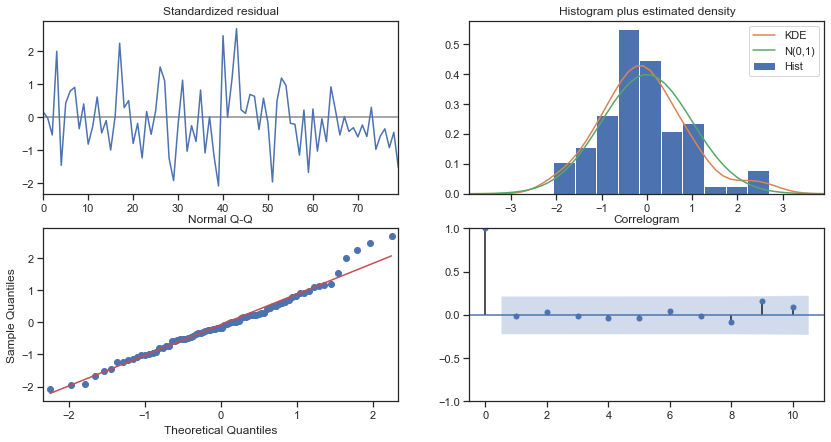

In [168]:
results_auto_SARIMA_6.plot_diagnostics()
plt.show()

In [169]:
predicted_auto_SARIMA_6 = results_auto_SARIMA_6.get_forecast(steps=len(test))

In [170]:
predicted_auto_SARIMA_6.summary_frame(alpha=0.05).head()

y         mean     mean_se  mean_ci_lower  mean_ci_upper
0  1430.856028  431.188138     585.742807    2275.969248
1  1540.543198  458.365478     642.163370    2438.923027
2  1707.566564  460.139396     805.709919    2609.423208
3  1859.148279  466.706258     944.420822    2773.875736
4  1501.662164  467.009335     586.340688    2416.983640

In [171]:
rmse_auto_sarima = mean_squared_error(test['Sales'],predicted_auto_SARIMA_6.predicted_mean,squared=False)
print(rmse_auto_sarima)

331.63201207652526


In [172]:
resultsDf_9_1 = pd.DataFrame({'Test RMSE': rmse_auto_sarima}
                           ,index=['(3,1,3),(3,1,0,12),Auto_SARIMA'])

resultsDf = pd.concat([resultsDf, resultsDf_9_1])
resultsDf

Test RMSE
RegressionOnTime                                    1389.135175
NaiveModel                                          3864.279352
SimpleAverageModel                                  1275.081804
2pointTrailingMovingAverage                          813.400684
4pointTrailingMovingAverage                         1156.589694
6pointTrailingMovingAverage                         1283.927428
9pointTrailingMovingAverage                         1346.278315
Alpha=0.0,SimpleExponentialSmoothing_Auto_Fit       1275.081823
Alpha=0.1,SimpleExponentialSmoothing                1375.393398
Alpha=0.6477,Beta=0.0,DoubleExponentialSmoothin...  1275.081823
Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing       1778.564670
Alpha=0.08621,Beta=1.3722,Gamma=0.4763,TrippleE...  1275.081823
Alpha=0.4,Beta=0.1,Gamma=0.3,TripleExponentialS...   326.869742
p=2,d=1,q=2,Auto_ARIMA                              1374.484105
(3,1,3),(3,1,0,12),Auto_SARIMA                       331.632012

# Model 10 - Manual ARIMA

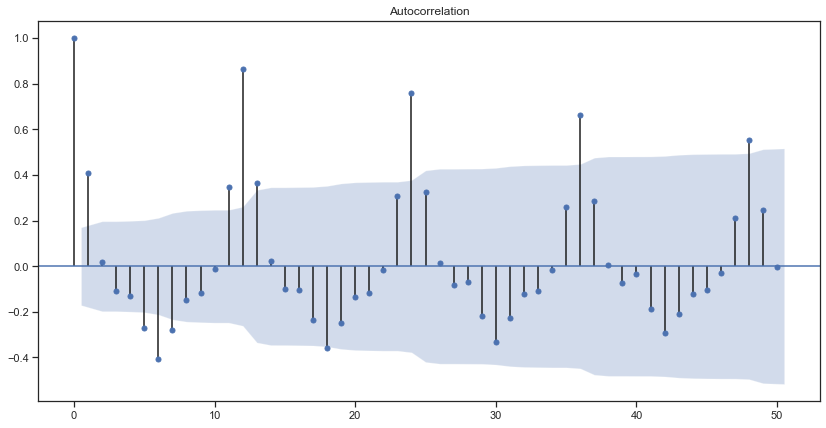

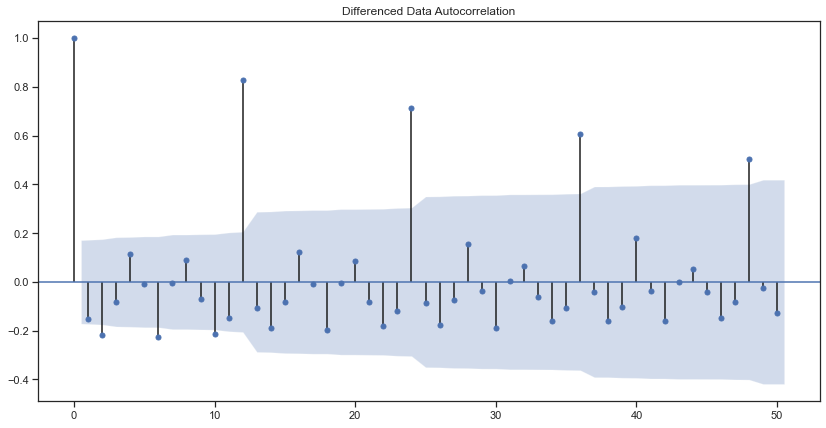

In [253]:
plot_acf(train['Sales'],lags=50)
plot_acf(train['Sales'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plt.show()

Looking at the ACF plot for original series, we can see a significant decay after lag 1, hence we choose p value to be 1. i.e. p = 1 in this case

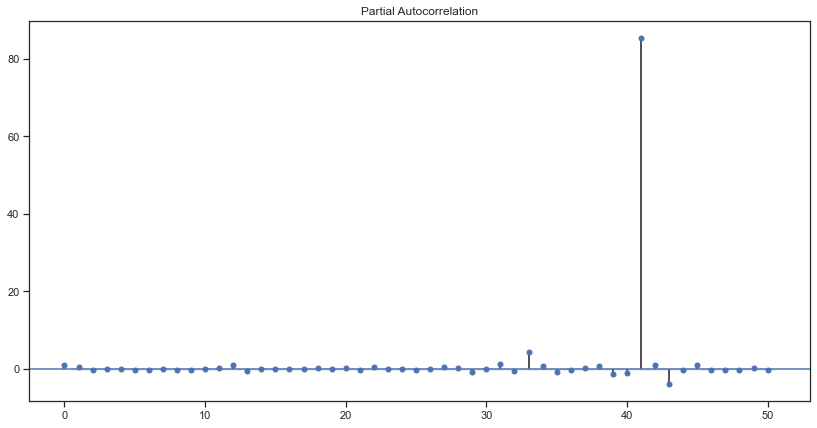

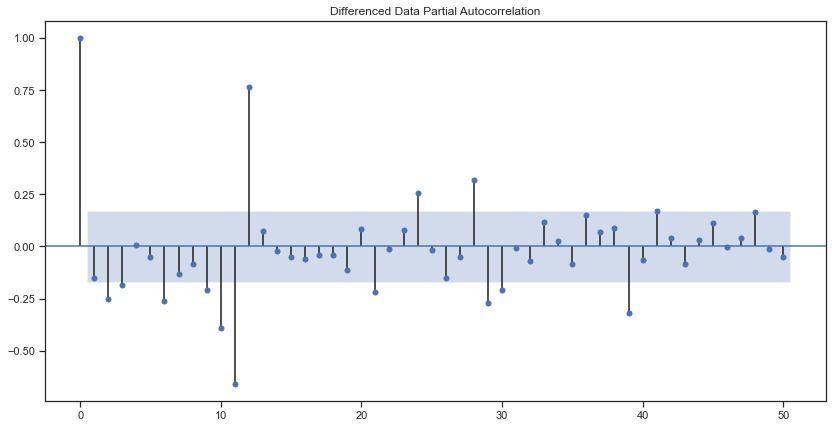

In [254]:
plot_pacf(train['Sales'],lags=50)
plot_pacf(train['Sales'].diff().dropna(),lags=50,title='Differenced Data Partial Autocorrelation')
plt.show()

Looking at the PCF plot, we can see significant decay after lag 1, hence q value will be 1 in this case. i.e q = 1

We had earlier seen that to make the series stationary we had to take a difference of 1. Hence the value of d will be 1. i.e. d=1

In [262]:
# Creating an empty Dataframe with column names only
ARIMA_AIC = pd.DataFrame(columns=['param', 'AIC'])
ARIMA_AIC

Empty DataFrame
Columns: [param, AIC]
Index: []

In [263]:
param=(1,1,1)
ARIMA_model = ARIMA(train['Sales'].values,order=param).fit()
print('ARIMA{} - AIC:{}'.format(param,ARIMA_model.aic))
ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)

ARIMA(1, 1, 1) - AIC:2235.0139453494457


In [264]:
ARIMA_AIC

param          AIC
0  (1, 1, 1)  2235.013945

In [265]:
predicted_manual_ARIMA = ARIMA_model.forecast(steps=len(test))

In [266]:
predicted_manual_ARIMA[0]

array([4215.69362821, 3434.02498101, 3102.58918143, 2964.27679227,
       2908.8029873 , 2888.86206265, 2884.16265374, 2886.00095862,
       2890.64355819, 2896.48903524, 2902.85047599, 2909.43323481,
       2916.11092607, 2922.82933776, 2929.56521612, 2936.30858666,
       2943.0551709 , 2949.80313362, 2956.55168764, 2963.30049529,
       2970.04941173, 2976.79837483, 2983.54735795, 2990.29634966,
       2997.04534505, 3003.79434202, 3010.54333966, 3017.2923376 ,
       3024.04133566, 3030.79033378, 3037.53933192, 3044.28833006,
       3051.03732822, 3057.78632637, 3064.53532453, 3071.28432268,
       3078.03332084, 3084.78231899, 3091.53131715, 3098.28031531,
       3105.02931346, 3111.77831162, 3118.52730977, 3125.27630793,
       3132.02530608, 3138.77430424, 3145.5233024 , 3152.27230055,
       3159.02129871, 3165.77029686, 3172.51929502, 3179.26829317,
       3186.01729133, 3192.76628949, 3199.51528764])

In [267]:
rmse_manual_ARIMA = mean_squared_error(test['Sales'],predicted_manual_ARIMA[0],squared=False)
print(rmse_manual_ARIMA)

1461.6680814913636


In [269]:
print(ARIMA_model.summary())

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                  131
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1113.507
Method:                       css-mle   S.D. of innovations           1171.377
Date:                Sun, 08 Nov 2020   AIC                           2235.014
Time:                        23:32:17   BIC                           2246.515
Sample:                             1   HQIC                          2239.687
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.7490      4.616      1.462      0.144      -2.299      15.797
ar.L1.D.y      0.4289      0.082      5.221      0.000       0.268       0.590
ma.L1.D.y     -1.0000      0.019    -51.962      0.0

In [200]:
resultsDf_10_1 = pd.DataFrame({'Test RMSE': rmse_manual_ARIMA}
                           ,index=['(1,1,1),Manual_ARIMA'])

resultsDf = pd.concat([resultsDf, resultsDf_10_1])
resultsDf

Test RMSE
RegressionOnTime                                    1389.135175
NaiveModel                                          3864.279352
SimpleAverageModel                                  1275.081804
2pointTrailingMovingAverage                          813.400684
4pointTrailingMovingAverage                         1156.589694
6pointTrailingMovingAverage                         1283.927428
9pointTrailingMovingAverage                         1346.278315
Alpha=0.0,SimpleExponentialSmoothing_Auto_Fit       1275.081823
Alpha=0.1,SimpleExponentialSmoothing                1375.393398
Alpha=0.6477,Beta=0.0,DoubleExponentialSmoothin...  1275.081823
Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing       1778.564670
Alpha=0.08621,Beta=1.3722,Gamma=0.4763,TrippleE...  1275.081823
Alpha=0.4,Beta=0.1,Gamma=0.3,TripleExponentialS...   326.869742
p=2,d=1,q=2,Auto_ARIMA                              1374.484105
(3,1,3),(3,1,0,12),Auto_SARIMA                       331.632012
(1,1,1),Manual_ARIMA                                1461.668081

# Model 11 - Manual SARIMA

Keeping the p,D,q values the same, we can see considerable spikes at lags, 12,24,36,48 etc. Also looking at the correlation heatmap between various lags we could see warmer regions between lag 1 and lag13 i.e. difference of 12, and so and so forth.
Hence we take seasonality to be 12 in this case.

p = 1
D = 1 
q = 1
S = 12

In [192]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

Empty DataFrame
Columns: [param, seasonal, AIC]
Index: []

In [193]:
import statsmodels.api as sm

manual_SARIMA = sm.tsa.statespace.SARIMAX(train['Sales'].values,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 1, 12),
                                enforc1e_stationarity=False,
                                enforce_invertibility=False)
results_manual_SARIMA = manual_SARIMA.fit(maxiter=1000)
print(results_manual_SARIMA.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  132
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -780.336
Date:                            Sun, 08 Nov 2020   AIC                           1570.672
Time:                                    14:27:01   BIC                           1583.942
Sample:                                         0   HQIC                          1576.050
                                            - 132                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1662      0.120      1.388      0.165      -0.068       0.401
ma.L1         -0.9398      0.057   

In [194]:
SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_manual_SARIMA.aic},
                               ignore_index=True)
SARIMA_AIC

param       seasonal          AIC
0  (1, 1, 1)  (1, 1, 1, 12)  1570.672464

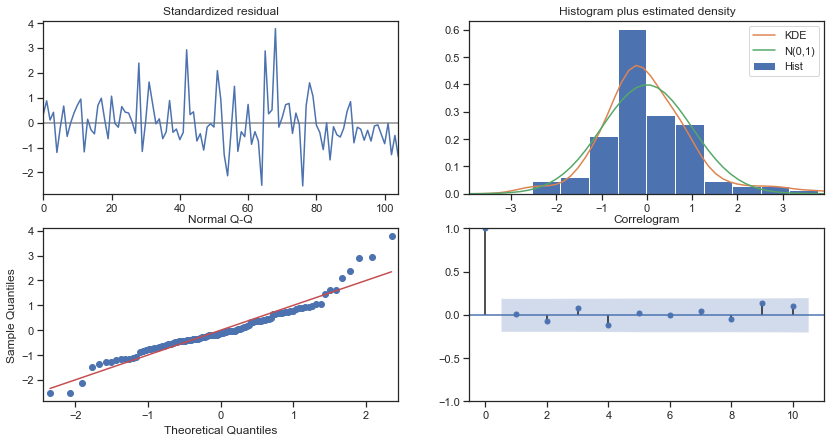

In [195]:
results_manual_SARIMA.plot_diagnostics()
plt.show()

In [196]:
predicted_manual_SARIMA_6 = results_manual_SARIMA.get_forecast(steps=len(test))

In [197]:
predicted_manual_SARIMA_6.summary_frame(alpha=0.05).head()

y         mean     mean_se  mean_ci_lower  mean_ci_upper
0  1548.278525  407.077414     750.421454    2346.135597
1  1304.678374  417.375526     486.637375    2122.719373
2  1815.821972  419.269991     994.067890    2637.576053
3  1641.835514  420.423069     817.821441    2465.849588
4  1552.093275  421.468809     726.029589    2378.156961

In [198]:
rmse_manual_sarima = mean_squared_error(test['Sales'],predicted_manual_SARIMA_6.predicted_mean,squared=False)
print(rmse_manual_sarima)

375.61401138753894


In [271]:
rmse_manual_sarima

375.61401138753894

In [275]:
resultsDf_10_1 = pd.DataFrame({'Test RMSE': rmse_manual_sarima}
                           ,index=['(1,1,1)(1,1,1,12),Manual_SARIMA'])

resultsDf = pd.concat([resultsDf, resultsDf_10_1])
resultsDf

Test RMSE
RegressionOnTime                                    1389.135175
NaiveModel                                          3864.279352
SimpleAverageModel                                  1275.081804
2pointTrailingMovingAverage                          813.400684
4pointTrailingMovingAverage                         1156.589694
6pointTrailingMovingAverage                         1283.927428
9pointTrailingMovingAverage                         1346.278315
Alpha=0.0,SimpleExponentialSmoothing_Auto_Fit       1275.081823
Alpha=0.1,SimpleExponentialSmoothing                1375.393398
Alpha=0.6477,Beta=0.0,DoubleExponentialSmoothin...  1275.081823
Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing       1778.564670
Alpha=0.08621,Beta=1.3722,Gamma=0.4763,TrippleE...  1275.081823
Alpha=0.4,Beta=0.1,Gamma=0.3,TripleExponentialS...   326.869742
p=2,d=1,q=2,Auto_ARIMA                              1374.484105
(3,1,3),(3,1,0,12),Auto_SARIMA                       331.632012
(1,1,1),Manual_ARIMA                                1461.668081
(1,1,1)(1,1,1,12),Manual_SARIMA                      375.614011

# Comparison of all Models

In [276]:
resultsDf.sort_values(by=['Test RMSE'])

Test RMSE
Alpha=0.4,Beta=0.1,Gamma=0.3,TripleExponentialS...   326.869742
(3,1,3),(3,1,0,12),Auto_SARIMA                       331.632012
(1,1,1)(1,1,1,12),Manual_SARIMA                      375.614011
2pointTrailingMovingAverage                          813.400684
4pointTrailingMovingAverage                         1156.589694
SimpleAverageModel                                  1275.081804
Alpha=0.0,SimpleExponentialSmoothing_Auto_Fit       1275.081823
Alpha=0.6477,Beta=0.0,DoubleExponentialSmoothin...  1275.081823
Alpha=0.08621,Beta=1.3722,Gamma=0.4763,TrippleE...  1275.081823
6pointTrailingMovingAverage                         1283.927428
9pointTrailingMovingAverage                         1346.278315
p=2,d=1,q=2,Auto_ARIMA                              1374.484105
Alpha=0.1,SimpleExponentialSmoothing                1375.393398
RegressionOnTime                                    1389.135175
(1,1,1),Manual_ARIMA                                1461.668081
Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing       1778.564670
NaiveModel                                          3864.279352

## Looking at the RMSE figures we can conclude that the Tripple Exponential Smoothing or the Holt - Winters Model is the most optimized model and hence future predictions will be done using this model.

In [286]:
date = pd.date_range(start='8/1/1995', end='7/1/1996', freq='MS')
date

DatetimeIndex(['1995-08-01', '1995-09-01', '1995-10-01', '1995-11-01',
               '1995-12-01', '1996-01-01', '1996-02-01', '1996-03-01',
               '1996-04-01', '1996-05-01', '1996-06-01', '1996-07-01'],
              dtype='datetime64[ns]', freq='MS')

In [287]:
future_predictions=pd.DataFrame(columns=['Predictions'],index=date)

## Predicition using Tripple Exponential Smoothening Model

In [288]:
TES_train = df_sparkling.copy()

We will use Trend=Multiplicative and Seasonality=Multiplicative since this is the model which gave us the best results earlier in the training phase. 

In [289]:
model_TES_tm_sm = ExponentialSmoothing(TES_train['Sales'],trend='multiplicative',seasonal='multiplicative')

In [290]:
alpha=0.4
beta=0.1
gamma=0.3
model_TES = model_TES_tm_sm.fit(smoothing_level=alpha,smoothing_slope=beta,smoothing_seasonal=gamma,
                                optimized=False,use_brute=True)

In [291]:
prediction=model_TES.forecast(steps=12)

In [292]:
future_predictions['Predictions']=prediction

In [293]:
future_predictions

Predictions
1995-08-01  1994.197570
1995-09-01  2661.748348
1995-10-01  3497.632630
1995-11-01  4370.320057
1995-12-01  6919.218345
1996-01-01  1548.592493
1996-02-01  1982.230450
1996-03-01  2244.683691
1996-04-01  2149.422207
1996-05-01  1928.567787
1996-06-01  1831.097911
1996-07-01  2277.133204

In [247]:
#In the below code, we have calculated the upper and lower confidence bands at 95% confidence level
#Here we are taking the multiplier to be 1.96 as we want to plot with respect to a 95% confidence intervals.
pred_df = pd.DataFrame({'lower_CI':prediction - 1.96*np.std(model_TES.resid,ddof=1),
                          'prediction':prediction,
                          'upper_ci': prediction + 1.96*np.std(model_TES.resid,ddof=1)})
pred_df.head()

lower_CI   prediction     upper_ci
1995-08-01  1211.388428  1994.197570  2777.006713
1995-09-01  1878.939206  2661.748348  3444.557491
1995-10-01  2714.823488  3497.632630  4280.441772
1995-11-01  3587.510915  4370.320057  5153.129199
1995-12-01  6136.409202  6919.218345  7702.027487

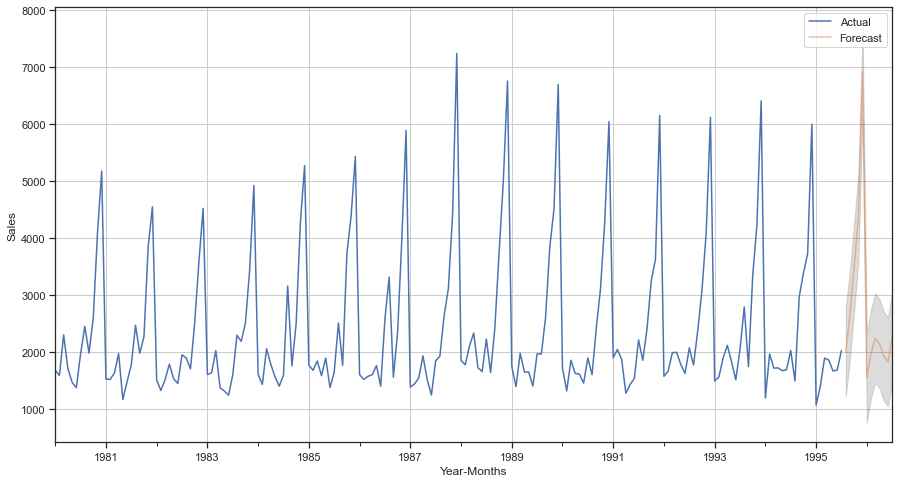

In [249]:
# plot the forecast along with the confidence band

axis = df_sparkling['Sales'].plot(label='Actual', figsize=(15,8))
pred_df['prediction'].plot(ax=axis, label='Forecast', alpha=0.5)
axis.fill_between(pred_df.index, pred_df['lower_CI'], pred_df['upper_ci'], color='k', alpha=.15)
axis.set_xlabel('Year-Months')
axis.set_ylabel('Sales')
plt.legend(loc='best')
plt.grid()
plt.show()